کتابخانه ها

In [1]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical


ستون ها

In [2]:
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
           'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
           'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'attack', 'level']


مسیر دیتاست

In [9]:
df_path = "KDDT.txt"


خواندن فایل های ترین و تست

In [10]:
df_data = pd.read_csv(df_path, names=columns)


In [11]:
df_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160362,0,udp,domain_u,SF,43,43,0,0,0,0,...,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,normal,18
160363,0,tcp,http,SF,336,285,0,0,0,0,...,0.92,0.02,0.00,0.00,0.00,0.00,0.05,0.00,normal,18
160364,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.37,0.03,0.01,0.02,0.05,0.08,0.85,0.58,mscan,13
160365,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00,mscan,15


In [12]:
def move_attack_to_end(df):
    attack_column = df.pop('attack')
    df.insert(len(df.columns), 'attack', attack_column)
    return df

df_data = move_attack_to_end(df_data)


In [13]:
df_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160362,0,udp,domain_u,SF,43,43,0,0,0,0,...,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,18,normal
160363,0,tcp,http,SF,336,285,0,0,0,0,...,0.92,0.02,0.00,0.00,0.00,0.00,0.05,0.00,18,normal
160364,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.37,0.03,0.01,0.02,0.05,0.08,0.85,0.58,13,mscan
160365,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00,15,mscan


In [14]:
df_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160362,0,udp,domain_u,SF,43,43,0,0,0,0,...,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,18,normal
160363,0,tcp,http,SF,336,285,0,0,0,0,...,0.92,0.02,0.00,0.00,0.00,0.00,0.05,0.00,18,normal
160364,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.37,0.03,0.01,0.02,0.05,0.08,0.85,0.58,13,mscan
160365,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00,15,mscan


تقسیم بندی حملات به 5 سمت

In [15]:

df_data['attack'] = df_data['attack'].apply(lambda x: 'normal' if x == 'normal' else (
    'Probing' if x in ['port-Sweep', 'ip-Sweep', 'nmap', 'satan', 'saint', 'mscan'] else (
        'Dos' if x in ['neptune', 'smurf', 'pod', 'teardrop', 'land', 'back', 'apache2', 'udpstorm', 'processtable',
                       'mail-Bomb'] else (
            'U2R' if x in ['buffer-Overflow', 'load-Module', 'perl', 'rootkit', 'xterm', 'ps', 'sqlattack'] else 'R2L'))))


In [16]:
df_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160362,0,udp,domain_u,SF,43,43,0,0,0,0,...,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,18,normal
160363,0,tcp,http,SF,336,285,0,0,0,0,...,0.92,0.02,0.00,0.00,0.00,0.00,0.05,0.00,18,normal
160364,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.37,0.03,0.01,0.02,0.05,0.08,0.85,0.58,13,Probing
160365,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00,15,Probing


جدا کردن ویژگی ها و خروجی ها

In [17]:
from sklearn.model_selection import train_test_split

# Assuming df_data is your DataFrame and the last column is the target (adjust if needed)
X = df_data.iloc[:, :-1]  # Features (all columns except the last)
y = df_data.iloc[:, -1]   # Target variable (last column)

# Splitting the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (128293, 42)
X_test shape: (32074, 42)
y_train shape: (128293,)
y_test shape: (32074,)


In [18]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
126455,2,tcp,telnet,SF,24,109,0,0,0,0,...,85,0.33,0.11,0.02,0.02,0.00,0.00,0.87,0.69,7
32114,0,tcp,echo,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,20
27892,0,tcp,smtp,SF,1027,325,0,0,0,0,...,59,0.92,0.05,0.02,0.00,0.00,0.00,0.00,0.00,21
155566,2,tcp,telnet,SF,24,306,0,0,0,0,...,90,0.32,0.03,0.01,0.02,0.02,0.01,0.90,0.63,7
61014,0,tcp,netstat,S0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,1.00,1.00,0.00,0.00,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158364,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,33,0.13,0.01,0.13,0.00,0.00,0.00,0.00,0.00,18
138895,0,tcp,http,SF,253,5940,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21
149798,0,udp,domain_u,SF,46,133,0,0,0,0,...,179,0.71,0.01,0.00,0.00,0.00,0.00,0.00,0.00,18
11636,0,tcp,http,SF,316,1247,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.00,0.00,0.00,0.00,21


In [19]:
X_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
103969,0,tcp,http,SF,324,7564,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,18
32049,0,icmp,eco_i,SF,8,0,0,0,0,0,...,99,1.00,0.00,1.00,0.51,0.0,0.00,0.00,0.00,15
149901,900,tcp,http,RSTR,57964,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.00,0.22,0.22,15
116997,0,tcp,http,SF,287,1414,0,0,0,0,...,159,1.00,0.00,0.08,0.04,0.0,0.00,0.00,0.00,21
115520,0,tcp,http,REJ,0,0,0,0,0,0,...,254,1.00,0.00,0.05,0.17,0.0,0.00,1.00,0.98,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107508,0,tcp,http,SF,221,4624,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21
17581,294,tcp,telnet,SF,237,1885,0,0,0,0,...,35,0.16,0.03,0.00,0.00,0.0,0.03,0.01,0.06,20
93162,0,tcp,private,S0,0,0,0,0,0,0,...,16,0.06,0.08,0.00,0.00,1.0,1.00,0.00,0.00,19
122163,0,tcp,private,S0,0,0,0,0,0,0,...,3,0.01,0.06,0.00,0.00,1.0,1.00,0.00,0.00,21


In [20]:
y_train

126455    Probing
32114         Dos
27892      normal
155566    Probing
61014         Dos
           ...   
158364        Dos
138895     normal
149798     normal
11636      normal
61671      normal
Name: attack, Length: 128293, dtype: object

بررسی تعداد داد هه ای خالی هر ستون

In [21]:
missing_values_X_train = X_train.isnull().sum()

missing_values_X_test = X_test.isnull().sum()

print("Missing values in X_train:")
print(missing_values_X_train)

print("\nMissing values in X_test:")
print(missing_values_X_test)


Missing values in X_train:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate   

In [ ]:
# برای پر کردن ستون های خالی هست چون داد هخالی نداریم احتیاج نیست

#for column in X_train.select_dtypes(include=['float64', 'int64']).columns:
#    X_train[column].fillna(X_train[column].median(), inplace=True)
#    X_test[column].fillna(X_test[column].median(), inplace=True)

#for column in X_train.select_dtypes(include=['object']).columns:
#    X_train[column].fillna(X_train[column].mode()[0], inplace=True)
#    X_test[column].fillna(X_test[column].mode()[0], inplace=True)



تبدیل داده های متنی به عدد

In [22]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
126455,2,tcp,telnet,SF,24,109,0,0,0,0,...,85,0.33,0.11,0.02,0.02,0.00,0.00,0.87,0.69,7
32114,0,tcp,echo,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,20
27892,0,tcp,smtp,SF,1027,325,0,0,0,0,...,59,0.92,0.05,0.02,0.00,0.00,0.00,0.00,0.00,21
155566,2,tcp,telnet,SF,24,306,0,0,0,0,...,90,0.32,0.03,0.01,0.02,0.02,0.01,0.90,0.63,7
61014,0,tcp,netstat,S0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,1.00,1.00,0.00,0.00,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158364,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,33,0.13,0.01,0.13,0.00,0.00,0.00,0.00,0.00,18
138895,0,tcp,http,SF,253,5940,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21
149798,0,udp,domain_u,SF,46,133,0,0,0,0,...,179,0.71,0.01,0.00,0.00,0.00,0.00,0.00,0.00,18
11636,0,tcp,http,SF,316,1247,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.00,0.00,0.00,0.00,21


In [23]:
# Apply one-hot encoding to both train and test sets
X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

# Align columns in test set to match train set (handles missing/new columns)
X_train_dummies, X_test_dummies = X_train_dummies.align(X_test_dummies, join='left', axis=1, fill_value=0)

# Print the shapes to verify
print(f"X_train_dummies shape: {X_train_dummies.shape}")
print(f"X_test_dummies shape: {X_test_dummies.shape}")







X_train_dummies shape: (128293, 122)
X_test_dummies shape: (32074, 122)


In [28]:
X_train=X_train_dummies
X_test=X_test_dummies
X_train


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
126455,2,24,109,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
32114,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
27892,0,1027,325,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
155566,2,24,306,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
61014,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158364,0,1032,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
138895,0,253,5940,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
149798,0,46,133,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
11636,0,316,1247,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False


In [29]:
X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
103969,0,324,7564,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
32049,0,8,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
149901,900,57964,0,0,0,0,0,0,1,0,...,False,False,False,True,False,False,False,False,False,False
116997,0,287,1414,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
115520,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107508,0,221,4624,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
17581,294,237,1885,0,0,0,0,0,1,6,...,False,False,False,False,False,False,False,False,True,False
93162,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
122163,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


مقدار ستون هدف را تبدیل به عددی میکنیم

In [26]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Check y_train shape
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Convert only if y_train is one-hot encoded (2D)
if len(y_train.shape) == 2:  
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_train_labels = y_train  # Already 1D, no conversion needed
    y_test_labels = y_test

# Apply LabelEncoder (optional, usually not needed after argmax)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_labels)
y_test_encoded = label_encoder.transform(y_test_labels)

print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")



y_train shape: (128293,)
y_test shape: (32074,)
y_train_encoded shape: (128293,)
y_test_encoded shape: (32074,)


In [30]:
y_test

103969    normal
32049        R2L
149901       Dos
116997    normal
115520    normal
           ...  
107508    normal
17581     normal
93162        Dos
122163       Dos
128934    normal
Name: attack, Length: 32074, dtype: object

In [38]:
y_train

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

نرمالایز کردن داد ه ها با روش

minmax

In [26]:
X_train

array([[[0.        ],
        [0.5       ],
        [0.28985507],
        ...,
        [0.05      ],
        [0.        ],
        [0.95238095]],

       [[0.        ],
        [1.        ],
        [0.63768116],
        ...,
        [0.        ],
        [0.        ],
        [0.71428571]],

       [[0.        ],
        [0.5       ],
        [0.71014493],
        ...,
        [0.        ],
        [0.        ],
        [0.9047619 ]],

       ...,

       [[0.        ],
        [0.5       ],
        [0.7826087 ],
        ...,
        [0.01      ],
        [0.        ],
        [0.85714286]],

       [[0.        ],
        [0.5       ],
        [0.43478261],
        ...,
        [0.        ],
        [0.        ],
        [0.95238095]],

       [[0.        ],
        [0.5       ],
        [0.28985507],
        ...,
        [0.        ],
        [0.        ],
        [1.        ]]])

In [31]:

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print shape to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")






X_train_scaled shape: (128293, 122)
X_test_scaled shape: (32074, 122)


In [32]:
X_train=X_train_scaled
X_test=X_test_scaled
y_test=y_test_encoded
y_train=y_train_encoded


داده‌ها به شکل سه‌بعدی برای مدل‌های

RNN  وLSTM  

 تنظیم میکنیم.

In [33]:
X_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000035,1.739176e-08,8.321008e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,7.442224e-07,2.481035e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000035,1.739176e-08,2.335989e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128288,0.000000,7.478457e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
128289,0.000000,1.833381e-07,4.534568e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
128290,0.000000,3.333421e-08,1.015316e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
128291,0.000000,2.289915e-07,9.519539e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


برچسب‌ها به فرمت

one-hot encoding

تبدیل میکنیم.

In [34]:
y_test

array([4, 2, 0, ..., 0, 0, 4])

In [35]:
num_classes = 5
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [36]:
y_test

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

# **lstm**

مدل

lstm  



با تعداد مراحل ترین 5


In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Define the deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(y_train.shape[1], activation='softmax')  # Output layer (auto-matching categories)
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,  # Use `y_train` directly (no encoding needed)
                    validation_data=(X_test, y_test),
                    epochs=5, batch_size=32, verbose=1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Print test accuracy
print(f"Test Accuracy: {test_acc:.4f}")






Epoch 1/5
4010/4010 [==============================] - 31s 7ms/step - loss: 0.5099 - accuracy: 0.9412 - val_loss: 0.1524 - val_accuracy: 0.9806
Epoch 2/5
4010/4010 [==============================] - 30s 7ms/step - loss: 0.1954 - accuracy: 0.9652 - val_loss: 0.1323 - val_accuracy: 0.9782
Epoch 3/5
4010/4010 [==============================] - 29s 7ms/step - loss: 0.1742 - accuracy: 0.9687 - val_loss: 0.1161 - val_accuracy: 0.9876
Epoch 4/5
4010/4010 [==============================] - 29s 7ms/step - loss: 0.1643 - accuracy: 0.9698 - val_loss: 0.1173 - val_accuracy: 0.9804
Epoch 5/5
4010/4010 [==============================] - 28s 7ms/step - loss: 0.1620 - accuracy: 0.9692 - val_loss: 0.1050 - val_accuracy: 0.9857
Test Accuracy: 0.9857


In [46]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Assuming you have your X_train, y_train, X_test, y_test data already

# If y_train and y_test are one-hot encoded, convert them to 1D arrays (class labels)
if len(y_train.shape) > 1:
    y_train = np.argmax(y_train, axis=1)

if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

# Normalize Data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Flatten the input data (from 3D to 2D, as RandomForest requires 2D data)
X_train_flattened = X_train_scaled.reshape(X_train_scaled.shape[0], -1)  # Flattening
X_test_flattened = X_test_scaled.reshape(X_test_scaled.shape[0], -1)  # Flattening

# Compute class weights to handle class imbalance (if needed)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Define RandomForestClassifier with initial parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20,],  # Depth of each tree
    'min_samples_split': [2, 5],  # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 2],    # Minimum number of samples required to be at a leaf node

}

# Apply GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_flattened, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Train the model
best_rf_model.fit(X_train_flattened, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test_flattened)
y_true = y_test

# Classification accuracy and report
classification_acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {classification_acc:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))



Fitting 3 folds for each of 16 candidates, totalling 48 fits
Test Accuracy: 0.7705

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      7165
           1       0.83      0.54      0.65      2123
           2       0.89      0.20      0.32      3500
           3       0.00      0.00      0.00        45
           4       0.67      0.97      0.80      9711

    accuracy                           0.77     22544
   macro avg       0.67      0.51      0.53     22544
weighted avg       0.81      0.77      0.74     22544


Confusion Matrix:
[[6082    8    5    0 1070]
 [ 165 1147   14    0  797]
 [   0   82  683    9 2726]
 [   0    0   27    0   18]
 [  66  144   42    0 9459]]


In [47]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Assuming you have your X_train, y_train, X_test, y_test data already

# If y_train and y_test are one-hot encoded, convert them to 1D arrays (class labels)
if len(y_train.shape) > 1:
    y_train = np.argmax(y_train, axis=1)

if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

# Normalize Data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Flatten the input data (from 3D to 2D, as XGBoost requires 2D data)
X_train_flattened = X_train_scaled.reshape(X_train_scaled.shape[0], -1)  # Flattening
X_test_flattened = X_test_scaled.reshape(X_test_scaled.shape[0], -1)  # Flattening

# Compute class weights to handle class imbalance (if needed)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Define XGBoost Classifier with initial parameters
xgb_model = XGBClassifier(scale_pos_weight=class_weights_dict.get(1, 1), random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'max_depth': [10, 20],  # Depth of each tree
    'learning_rate': [0.01, 0.1],  # Learning rate
    'subsample': [0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.8, 1.0]  # Fraction of features used per tree
}

# Apply GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_flattened, y_train)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Train the model
best_xgb_model.fit(X_train_flattened, y_train)

# Make predictions
y_pred = best_xgb_model.predict(X_test_flattened)
y_true = y_test

# Classification accuracy and report
classification_acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {classification_acc:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Fitting 3 folds for each of 32 candidates, totalling 96 fits


c:\users\masud\appdata\local\programs\python\python38\lib\site-packages\xgboost\core.py:158: UserWarning: [12:31:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
c:\users\masud\appdata\local\programs\python\python38\lib\site-packages\xgboost\core.py:158: UserWarning: [12:32:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.7935

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      7165
           1       0.80      0.56      0.66      2123
           2       0.81      0.30      0.44      3500
           3       0.08      0.07      0.07        45
           4       0.71      0.97      0.82      9711

    accuracy                           0.79     22544
   macro avg       0.67      0.55      0.58     22544
weighted avg       0.81      0.79      0.77     22544


Confusion Matrix:
[[6205    8    7    0  945]
 [ 165 1185  156    0  617]
 [   0  138 1042   33 2287]
 [   0    0   32    3   10]
 [  67  144   46    0 9454]]


In [35]:
# ✅ Correct way to access the best model
test_loss, test_accuracy = best_model.model_.evaluate(X_test, y_test, verbose=0)  
y_pred = np.argmax(best_model.model_.predict(X_test), axis=1)  


705/705 [==============================] - 5s 7ms/step


In [36]:
y_true = np.argmax(y_test, axis=1)

In [37]:
classification_acc = accuracy_score(y_true, y_pred)

print(f"Best Hyperparameters: {grid_result.best_params_}")
print(f"Test Accuracy: {test_accuracy:.4f}, Classification Accuracy: {classification_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

Best Hyperparameters: {'batch_size': 64, 'build_fn': <function create_model at 0x000001F3BCD9B940>, 'dropout_rate': 0.2, 'epochs': 10, 'learning_rate': 0.005, 'units': 32}
Test Accuracy: 0.7808, Classification Accuracy: 0.7808

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7165
           1       0.51      0.43      0.47      2123
           2       0.61      0.30      0.40      3500
           3       0.00      0.00      0.00        45
           4       0.79      0.97      0.87      9711

    accuracy                           0.78     22544
   macro avg       0.56      0.51      0.52     22544
weighted avg       0.76      0.78      0.76     22544



c:\users\masud\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\masud\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\masud\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [33]:
print(f"Test Accuracy: {test_accuracy:.4f}, Classification Accuracy: {classification_acc:.4f}")

NameError: name 'test_accuracy' is not defined

In [34]:
classification_acc = accuracy_score(y_true, y_pred)

NameError: name 'y_true' is not defined

In [42]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# ✅ Ensure X_train, y_train are defined
try:
    print(f"Training Data Shape: {X_train.shape}, {y_train.shape}")
except NameError:
    raise ValueError("❌ X_train and y_train are not defined. Please load your dataset first!")

# ✅ Convert 3D array (samples, timesteps, features) -> 2D (samples, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# ✅ Convert one-hot encoded labels to class labels
y_train_encoded = np.argmax(y_train, axis=1)  
y_test_encoded = np.argmax(y_test, axis=1)  

# ✅ Define Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# ✅ Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 150],  # Number of trees
    'max_depth': [10, 20],  # Tree depth
    'min_samples_split': [2, 5],  # Min samples for split
    'min_samples_leaf': [1, 2],  # Min samples per leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# ✅ Perform GridSearchCV
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train_reshaped, y_train_encoded)

# ✅ Best model from GridSearch
best_model = grid_result.best_estimator_

# ✅ Evaluate on test data
y_pred = best_model.predict(X_test_reshaped)

classification_acc = accuracy_score(y_test_encoded, y_pred)

print(f"Best Hyperparameters: {grid_result.best_params_}")
print(f"Test Accuracy: {classification_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))





Training Data Shape: (125973, 42, 1), (125973, 5)
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Test Accuracy: 0.7762

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.91      7165
           1       0.80      0.55      0.65      2123
           2       0.90      0.21      0.35      3500
           3       0.35      0.13      0.19        45
           4       0.68      0.97      0.80      9711

    accuracy                           0.78     22544
   macro avg       0.74      0.54      0.58     22544
weighted avg       0.82      0.78      0.75     22544



705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


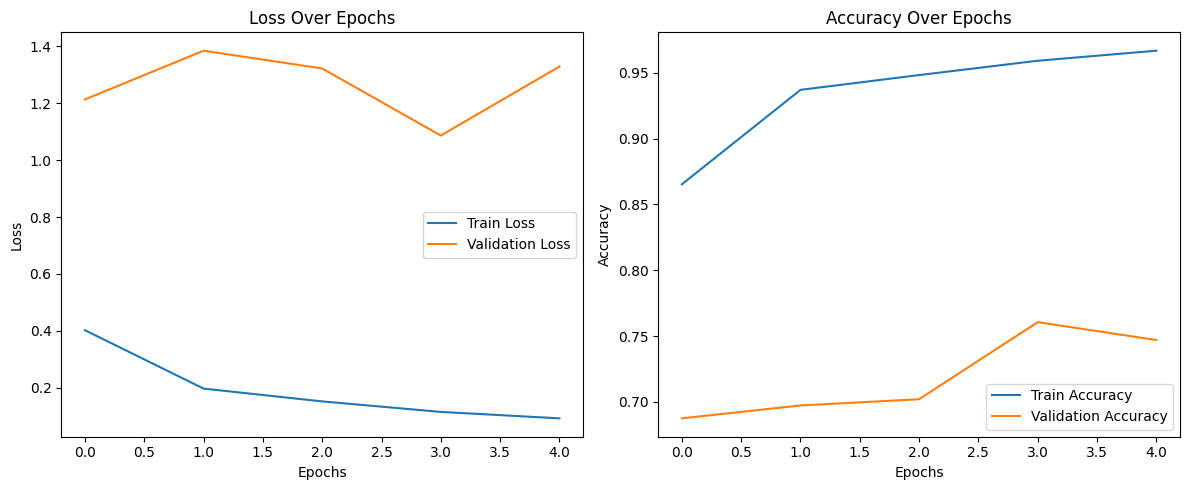

3937/3937 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     45927
           1       0.84      0.82      0.83      5126
           2       0.85      0.89      0.87      7564
           3       0.00      0.00      0.00        13
           4       0.99      0.99      0.99     67343

    accuracy                           0.98    125973
   macro avg       0.73      0.74      0.74    125973
weighted avg       0.98      0.98      0.98    125973

Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      7165
           1       0.47      0.51      0.49      2123
           2       0.39      0.14      0.21      3500
           3       0.00      0.00      0.00        45
           4       0.79      0.96      0.87      9711

    accuracy                           0.75     22544
   macro avg       0.50      0.49      0.48     22544
weighted avg     

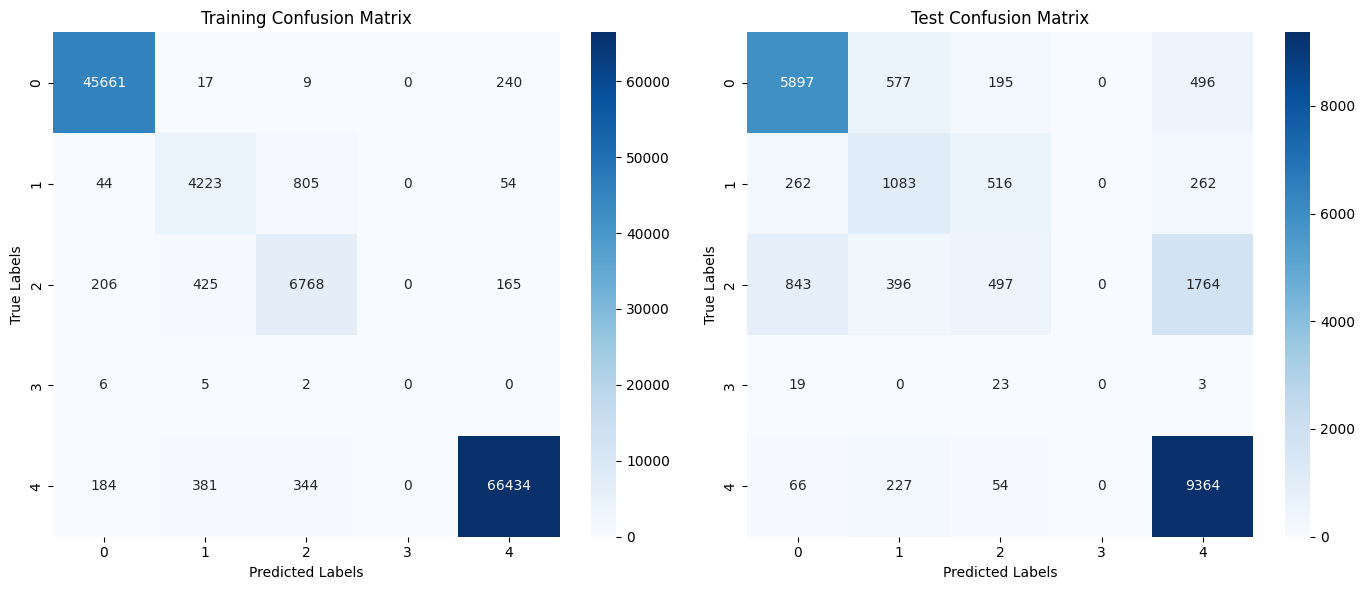

Test Accuracy: 0.7470
Classification Accuracy: 0.7470

Classification Report:
              precision    recall  f1-score   support

         Dos       0.83      0.82      0.83      7165
     Probing       0.47      0.51      0.49      2123
         R2L       0.39      0.14      0.21      3500
         U2R       0.00      0.00      0.00        45
      normal       0.79      0.96      0.87      9711

    accuracy                           0.75     22544
   macro avg       0.50      0.49      0.48     22544
weighted avg       0.71      0.75      0.72     22544

Test Accuracy: 0.7470, Classification Accuracy: 0.7470


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

classification_acc = accuracy_score(y_true, y_pred)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_acc = accuracy_score(y_train_true, y_train_pred)
train_report = classification_report(y_train_true, y_train_pred)
train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)

test_report = classification_report(y_true, y_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

print("Training Classification Report:")
print(train_report)

print("Test Classification Report:")
print(test_report)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Training Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Classification Accuracy: {classification_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


print(f"Test Accuracy: {test_accuracy:.4f}, Classification Accuracy: {classification_acc:.4f}")


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m



Test Accuracy: 0.7470, Training Accuracy: 0.9771



Training Classification Report:
              precision    recall  f1-score   support

         Dos     0.9905    0.9942    0.9923     45927
     Probing     0.8361    0.8238    0.8299      5126
         R2L     0.8537    0.8948    0.8737      7564
         U2R     0.0000    0.0000    0.0000        13
      normal     0.9931    0.9865    0.9898     67343

    accuracy                         0.9771    125973
   macro avg     0.7347    0.7399    0.7372    125973
weighted avg     0.9773    0.9771    0.9771    125973


Test Classification Report:
              precision    recall  f1-score   support

         Dos     0.8321    0.8230    0.8275      7165
     Probing     0.4744    0.5101    0.4916      2123
         R2L     0.3868    0.1420    0.2077      3500
         U2R     0.0000    0.0000    0.0000        45
      normal     0.7876    0.9643    0.8670      9711

    accuracy                         0.7470     22544
   macro avg    

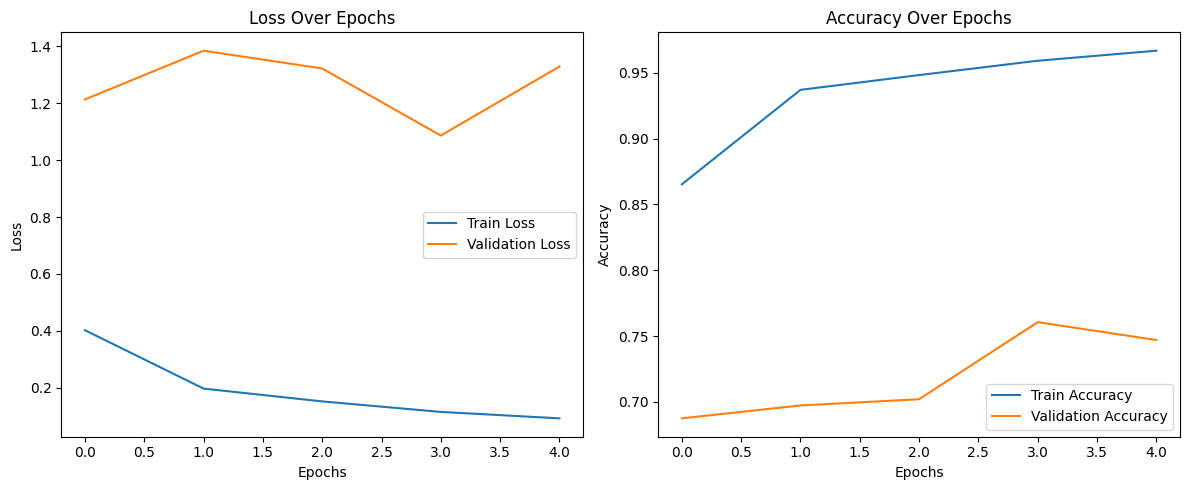

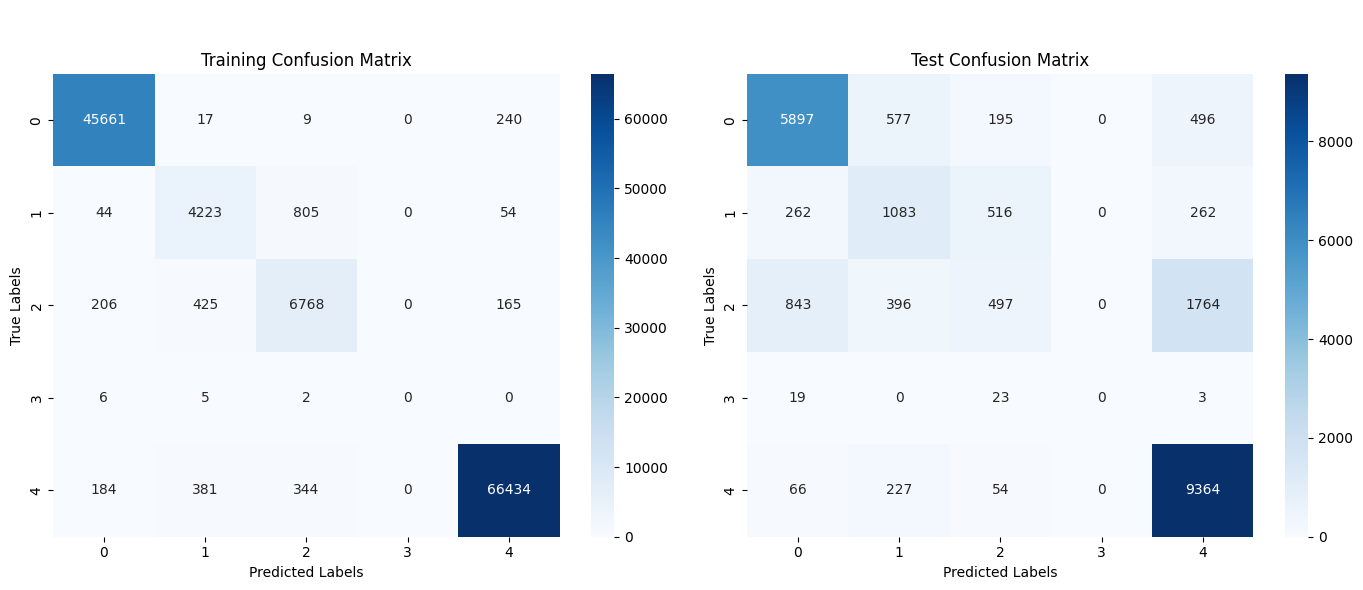


Per-Class Metrics for Training Data:
Dos: Precision=0.9905, Recall=0.9942, F1-Score=0.9923, Accuracy=0.9942
Probing: Precision=0.8361, Recall=0.8238, F1-Score=0.8299, Accuracy=0.8238
R2L: Precision=0.8537, Recall=0.8948, F1-Score=0.8737, Accuracy=0.8948
U2R: Precision=0.0000, Recall=0.0000, F1-Score=0.0000, Accuracy=0.0000
normal: Precision=0.9931, Recall=0.9865, F1-Score=0.9898, Accuracy=0.9865

Per-Class Confusion Matrices for Training Data:

Class: Dos
[[79606   440]
 [  266 45661]]

Class: Probing
[[120019    828]
 [   903   4223]]

Class: R2L
[[117249   1160]
 [   796   6768]]

Class: U2R
[[125960      0]
 [    13      0]]

Class: normal
[[58171   459]
 [  909 66434]]

Per-Class Metrics for Test Data:
Dos: Precision=0.8321, Recall=0.8230, F1-Score=0.8275, Accuracy=0.8230
Probing: Precision=0.4744, Recall=0.5101, F1-Score=0.4916, Accuracy=0.5101
R2L: Precision=0.3868, Recall=0.1420, F1-Score=0.2077, Accuracy=0.1420
U2R: Precision=0.0000, Recall=0.0000, F1-Score=0.0000, Accuracy=0.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_accuracy = accuracy_score(y_train_true, y_train_pred)

target_names = label_encoder.classes_

train_report = classification_report(y_train_true, y_train_pred, target_names=target_names, digits=4)
test_report = classification_report(y_true, y_pred, target_names=target_names, digits=4)

train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

def calculate_class_metrics(y_true, y_pred):
    metrics = {}
    for i, label in enumerate(target_names):
        precision = precision_score(y_true == i, y_pred == i)
        recall = recall_score(y_true == i, y_pred == i)
        f1 = f1_score(y_true == i, y_pred == i)
        accuracy = accuracy_score(y_true[y_true == i], y_pred[y_true == i])
        metrics[label] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy
        }
    return metrics




train_metrics = calculate_class_metrics(y_train_true, y_train_pred)
test_metrics = calculate_class_metrics(y_true, y_pred)


print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")



print("\n\n\nTraining Classification Report:")
print(train_report)
print("\nTest Classification Report:")
print(test_report)

# Additional metrics for all data (Precision, Recall, F1-Score, Accuracy)
def calculate_overall_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    }

train_overall_metrics = calculate_overall_metrics(y_train_true, y_train_pred)
test_overall_metrics = calculate_overall_metrics(y_true, y_pred)

print("Training Data:")
print(f"Precision: {train_overall_metrics['Precision']:.4f}")
print(f"Recall: {train_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {train_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {train_overall_metrics['Accuracy']:.4f}")

print("\nTest Data:")
print(f"Precision: {test_overall_metrics['Precision']:.4f}")
print(f"Recall: {test_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {test_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {test_overall_metrics['Accuracy']:.4f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('\n\nTraining Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


print("\nPer-Class Metrics for Training Data:")
for class_name, metrics in train_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")



print("\nPer-Class Confusion Matrices for Training Data:")
for i, label in enumerate(target_names):
    class_train_conf_matrix = confusion_matrix(y_train_true == i, y_train_pred == i)
    print(f"\nClass: {label}\n{class_train_conf_matrix}")



print("\nPer-Class Metrics for Test Data:")
for class_name, metrics in test_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")


print("\nPer-Class Confusion Matrices for Test Data:")
for i, label in enumerate(target_names):
    class_test_conf_matrix = confusion_matrix(y_true == i, y_pred == i)
    print(f"\nClass: {label}\n{class_test_conf_matrix}")

print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m



Test Accuracy: 0.7470, Training Accuracy: 0.9771



Training Classification Report:
              precision    recall  f1-score   support

         Dos     0.9905    0.9942    0.9923     45927
     Probing     0.8361    0.8238    0.8299      5126
         R2L     0.8537    0.8948    0.8737      7564
         U2R     0.0000    0.0000    0.0000        13
      normal     0.9931    0.9865    0.9898     67343

    accuracy                         0.9771    125973
   macro avg     0.7347    0.7399    0.7372    125973
weighted avg     0.9773    0.9771    0.9771    125973


Test Classification Report:
              precision    recall  f1-score   support

         Dos     0.8321    0.8230    0.8275      7165
     Probing     0.4744    0.5101    0.4916      2123
         R2L     0.3868    0.1420    0.2077      3500
         U2R     0.0000    0.0000    0.0000        45
      normal     0.7876    0.9643    0.8670      9711

    accuracy                         0.7470     22544
   macro avg    

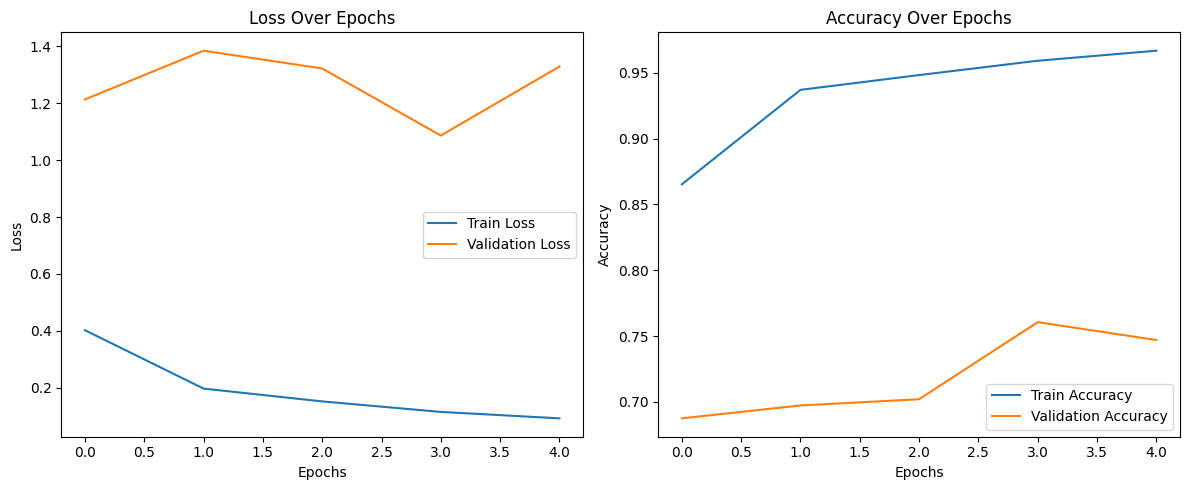

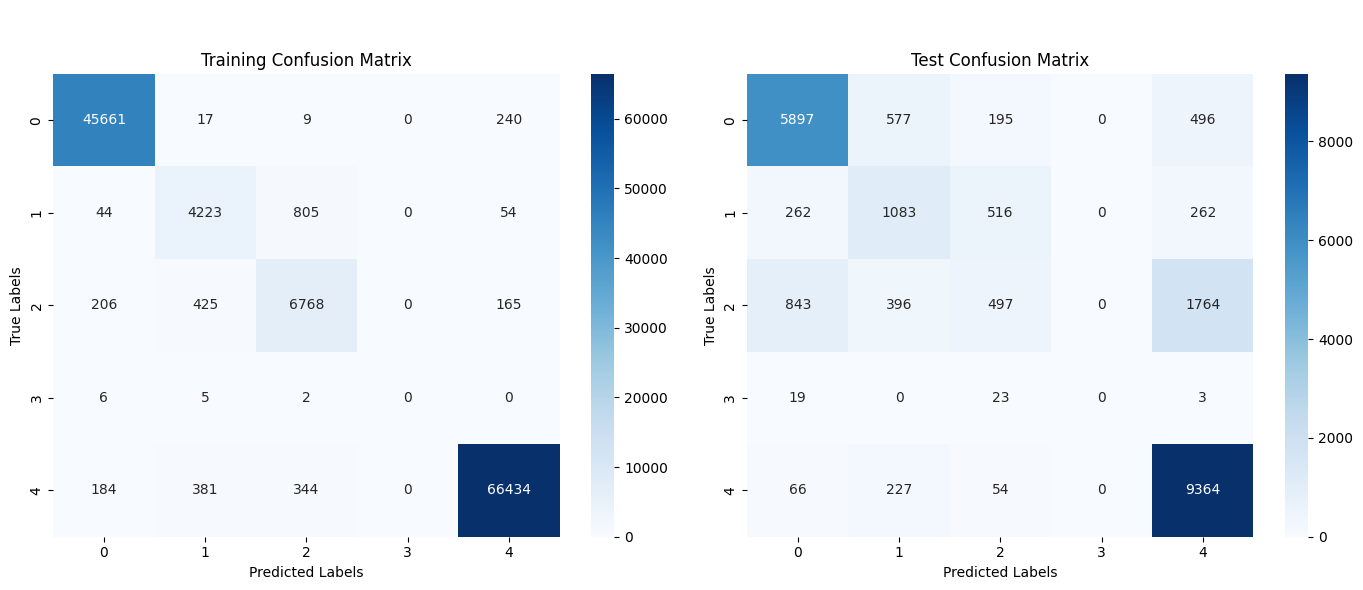


Per-Class Metrics for Training Data:
Dos: Precision=0.9905, Recall=0.9942, F1-Score=0.9923, Accuracy=0.9942
Probing: Precision=0.8361, Recall=0.8238, F1-Score=0.8299, Accuracy=0.8238
R2L: Precision=0.8537, Recall=0.8948, F1-Score=0.8737, Accuracy=0.8948
U2R: Precision=0.0000, Recall=0.0000, F1-Score=0.0000, Accuracy=0.0000
normal: Precision=0.9931, Recall=0.9865, F1-Score=0.9898, Accuracy=0.9865

Per-Class Confusion Matrices for Training Data:

Class: Dos
[[79606   440]
 [  266 45661]]

Class: Probing
[[120019    828]
 [   903   4223]]

Class: R2L
[[117249   1160]
 [   796   6768]]

Class: U2R
[[125960      0]
 [    13      0]]

Class: normal
[[58171   459]
 [  909 66434]]

Per-Class Metrics for Test Data:
Dos: Precision=0.8321, Recall=0.8230, F1-Score=0.8275, Accuracy=0.8230
Probing: Precision=0.4744, Recall=0.5101, F1-Score=0.4916, Accuracy=0.5101
R2L: Precision=0.3868, Recall=0.1420, F1-Score=0.2077, Accuracy=0.1420
U2R: Precision=0.0000, Recall=0.0000, F1-Score=0.0000, Accuracy=0.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_accuracy = accuracy_score(y_train_true, y_train_pred)

target_names = label_encoder.classes_

train_report = classification_report(y_train_true, y_train_pred, target_names=target_names, digits=4)
test_report = classification_report(y_true, y_pred, target_names=target_names, digits=4)

train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

def calculate_class_metrics(y_true, y_pred):
    metrics = {}
    for i, label in enumerate(target_names):
        precision = precision_score(y_true == i, y_pred == i)
        recall = recall_score(y_true == i, y_pred == i)
        f1 = f1_score(y_true == i, y_pred == i)
        accuracy = accuracy_score(y_true[y_true == i], y_pred[y_true == i])
        metrics[label] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy
        }
    return metrics




train_metrics = calculate_class_metrics(y_train_true, y_train_pred)
test_metrics = calculate_class_metrics(y_true, y_pred)


print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")



print("\n\n\nTraining Classification Report:")
print(train_report)
print("\nTest Classification Report:")
print(test_report)

# Additional metrics for all data (Precision, Recall, F1-Score, Accuracy)
def calculate_overall_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    }

train_overall_metrics = calculate_overall_metrics(y_train_true, y_train_pred)
test_overall_metrics = calculate_overall_metrics(y_true, y_pred)

print("Training Data:")
print(f"Precision: {train_overall_metrics['Precision']:.4f}")
print(f"Recall: {train_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {train_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {train_overall_metrics['Accuracy']:.4f}")

print("\nTest Data:")
print(f"Precision: {test_overall_metrics['Precision']:.4f}")
print(f"Recall: {test_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {test_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {test_overall_metrics['Accuracy']:.4f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('\n\nTraining Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


print("\nPer-Class Metrics for Training Data:")
for class_name, metrics in train_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")



print("\nPer-Class Confusion Matrices for Training Data:")
for i, label in enumerate(target_names):
    class_train_conf_matrix = confusion_matrix(y_train_true == i, y_train_pred == i)
    print(f"\nClass: {label}\n{class_train_conf_matrix}")



print("\nPer-Class Metrics for Test Data:")
for class_name, metrics in test_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")


print("\nPer-Class Confusion Matrices for Test Data:")
for i, label in enumerate(target_names):
    class_test_conf_matrix = confusion_matrix(y_true == i, y_pred == i)
    print(f"\nClass: {label}\n{class_test_conf_matrix}")

print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")


مدل

lstm  

با تعداد مراحل ترین 50

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report



model = Sequential()

model.add(LSTM(units=32, return_sequences=False, input_shape=(10, 1)))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
classification_acc = accuracy_score(y_true, y_pred)

classification_acc = accuracy_score(y_true, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Classification Accuracy: {classification_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))



print(f"Test Accuracy: {test_accuracy:.4f}, Classification Accuracy: {classification_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,789 (26.52 KB)

 Trainable params: 6,789 (26.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7824 - loss: 0.6051 - val_accuracy: 0.6705 - val_loss: 1.1176
Epoch 2/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9238 - loss: 0.2376 - val_accuracy: 0.7134 - val_loss: 0.9175
Epoch 3/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9425 - loss: 0.1670 - val_accuracy: 0.7194 - val_loss: 1.1838
Epoch 4/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9534 - loss: 0.1314 - val_accuracy: 0.7241 - val_loss: 1.1709
Epoch 5/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9595 - loss: 0.1122 - val_accuracy: 0.7367 - val_loss: 1.2766
Epoch 6/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9635 - loss: 0.0990 - val_accuracy: 0.7245 - val_loss: 1.5918
Epoch 7/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9680 - loss: 0.0877 - val_accuracy: 0.7491 - val_loss: 1.8000
Epoch 8/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9721 - loss: 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


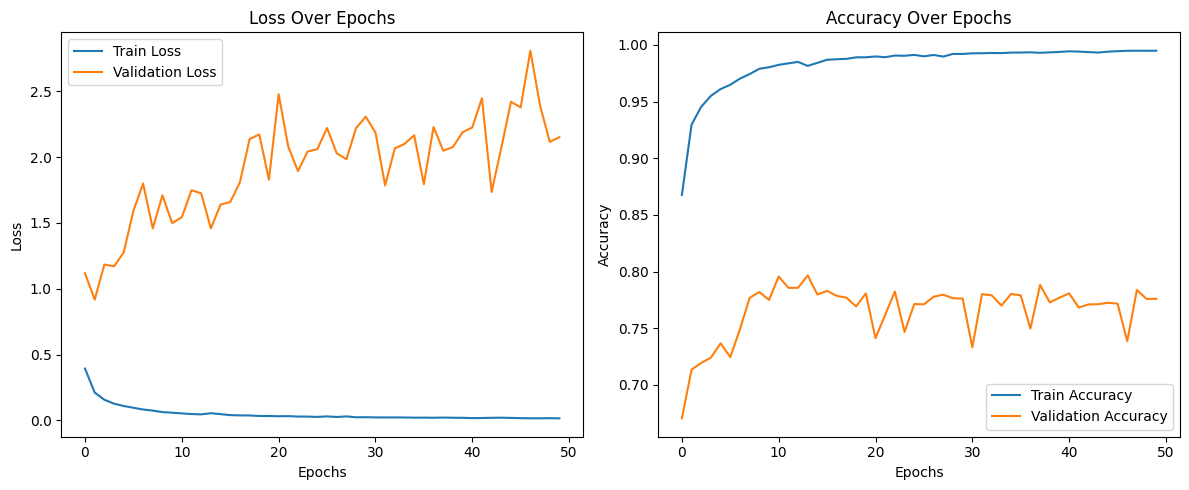

3937/3937 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45927
           1       0.99      0.98      0.99      5126
           2       0.97      0.99      0.98      7564
           3       0.00      0.00      0.00        13
           4       1.00      1.00      1.00     67343

    accuracy                           1.00    125973
   macro avg       0.79      0.79      0.79    125973
weighted avg       1.00      1.00      1.00    125973

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7165
           1       0.47      0.51      0.49      2123
           2       0.50      0.25      0.33      3500
           3       0.00      0.00      0.00        45
           4       0.79      0.97      0.87      9711

    accuracy                           0.78     22544
   macro avg       0.54      0.52      0.52     22544
weighted avg     

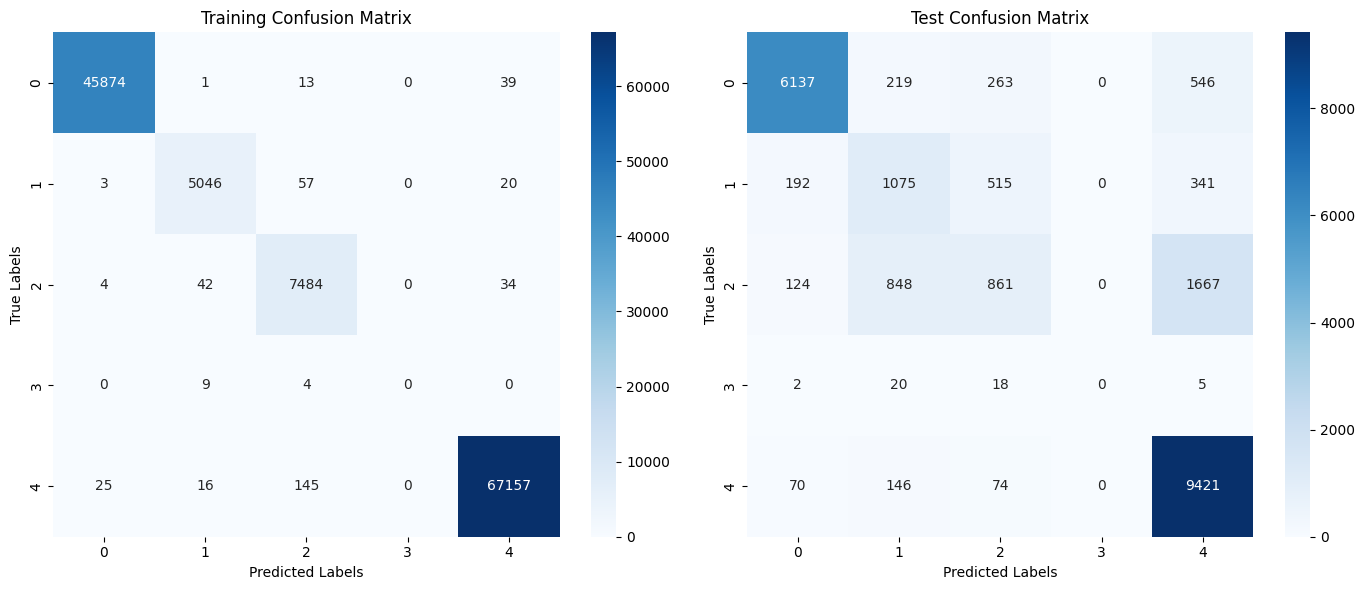

Test Accuracy: 0.7760
Classification Accuracy: 0.7760

Classification Report:
              precision    recall  f1-score   support

         Dos       0.94      0.86      0.90      7165
     Probing       0.47      0.51      0.49      2123
         R2L       0.50      0.25      0.33      3500
         U2R       0.00      0.00      0.00        45
      normal       0.79      0.97      0.87      9711

    accuracy                           0.78     22544
   macro avg       0.54      0.52      0.52     22544
weighted avg       0.76      0.78      0.76     22544

Test Accuracy: 0.7760, Classification Accuracy: 0.7760


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

classification_acc = accuracy_score(y_true, y_pred)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_acc = accuracy_score(y_train_true, y_train_pred)
train_report = classification_report(y_train_true, y_train_pred)
train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)

test_report = classification_report(y_true, y_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

print("Training Classification Report:")
print(train_report)

print("Test Classification Report:")
print(test_report)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Training Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Classification Accuracy: {classification_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))



print(f"Test Accuracy: {test_accuracy:.4f}, Classification Accuracy: {classification_acc:.4f}")


705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m



Test Accuracy: 0.7760, Training Accuracy: 0.9967



Training Classification Report:
              precision    recall  f1-score   support

         Dos     0.9993    0.9988    0.9991     45927
     Probing     0.9867    0.9844    0.9855      5126
         R2L     0.9716    0.9894    0.9804      7564
         U2R     0.0000    0.0000    0.0000        13
      normal     0.9986    0.9972    0.9979     67343

    accuracy                         0.9967    125973
   macro avg     0.7912    0.7940    0.7926    125973
weighted avg     0.9967    0.9967    0.9967    125973


Test Classification Report:
              precision    recall  f1-score   support

         Dos     0.9405    0.8565    0.8966      7165
     Probing     0.4658    0.5064    0.4852      2123
         R2L     0.4974    0.2460    0.3292      3500
         U2R     0.0000    0.0000    0.0000        45
      normal     0.7864    0.9701    0.8687      9711

    accuracy                         0.7760     22544
   macro avg    

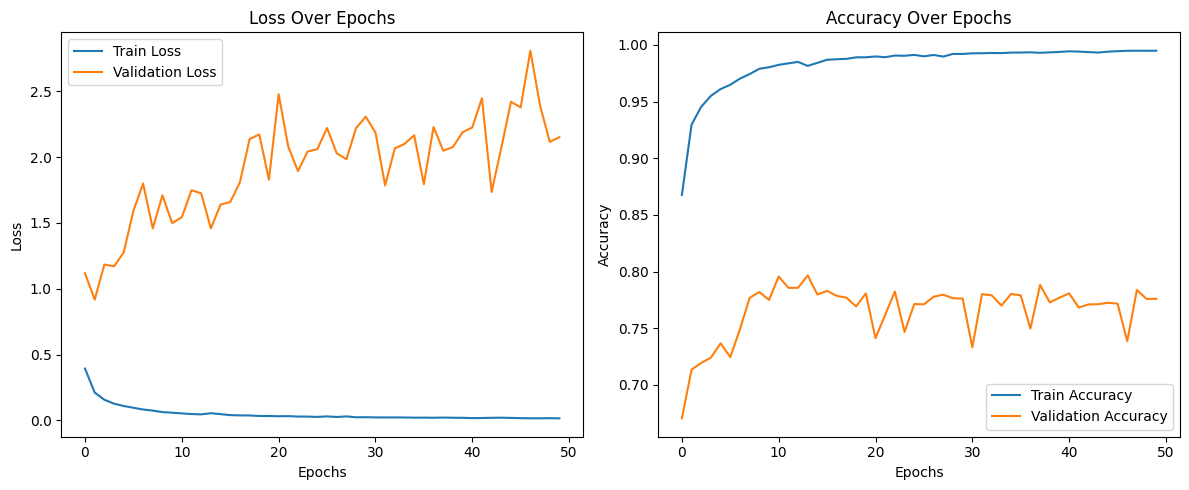

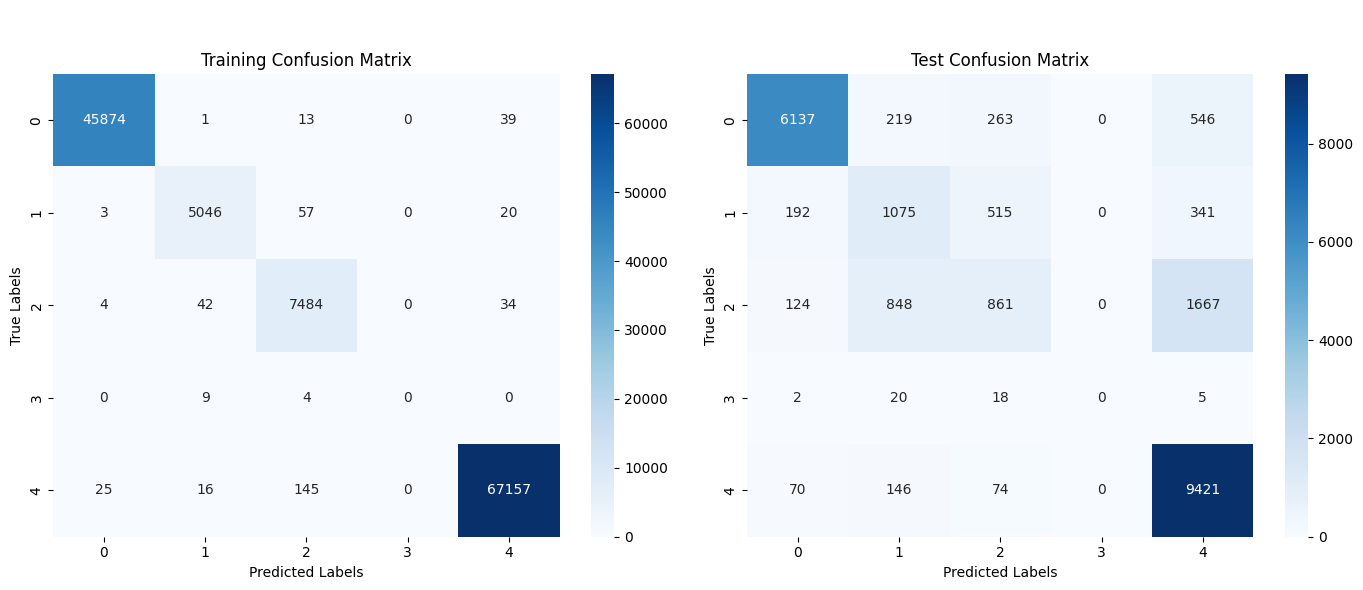


Per-Class Metrics for Training Data:
Dos: Precision=0.9993, Recall=0.9988, F1-Score=0.9991, Accuracy=0.9988
Probing: Precision=0.9867, Recall=0.9844, F1-Score=0.9855, Accuracy=0.9844
R2L: Precision=0.9716, Recall=0.9894, F1-Score=0.9804, Accuracy=0.9894
U2R: Precision=0.0000, Recall=0.0000, F1-Score=0.0000, Accuracy=0.0000
normal: Precision=0.9986, Recall=0.9972, F1-Score=0.9979, Accuracy=0.9972

Per-Class Confusion Matrices for Training Data:

Class: Dos
[[80014    32]
 [   53 45874]]

Class: Probing
[[120779     68]
 [    80   5046]]

Class: R2L
[[118190    219]
 [    80   7484]]

Class: U2R
[[125960      0]
 [    13      0]]

Class: normal
[[58537    93]
 [  186 67157]]

Per-Class Metrics for Test Data:
Dos: Precision=0.9405, Recall=0.8565, F1-Score=0.8966, Accuracy=0.8565
Probing: Precision=0.4658, Recall=0.5064, F1-Score=0.4852, Accuracy=0.5064
R2L: Precision=0.4974, Recall=0.2460, F1-Score=0.3292, Accuracy=0.2460
U2R: Precision=0.0000, Recall=0.0000, F1-Score=0.0000, Accuracy=0.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_accuracy = accuracy_score(y_train_true, y_train_pred)

target_names = label_encoder.classes_

train_report = classification_report(y_train_true, y_train_pred, target_names=target_names, digits=4)
test_report = classification_report(y_true, y_pred, target_names=target_names, digits=4)

train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

def calculate_class_metrics(y_true, y_pred):
    metrics = {}
    for i, label in enumerate(target_names):
        precision = precision_score(y_true == i, y_pred == i)
        recall = recall_score(y_true == i, y_pred == i)
        f1 = f1_score(y_true == i, y_pred == i)
        accuracy = accuracy_score(y_true[y_true == i], y_pred[y_true == i])
        metrics[label] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy
        }
    return metrics




train_metrics = calculate_class_metrics(y_train_true, y_train_pred)
test_metrics = calculate_class_metrics(y_true, y_pred)


print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")



print("\n\n\nTraining Classification Report:")
print(train_report)
print("\nTest Classification Report:")
print(test_report)

# Additional metrics for all data (Precision, Recall, F1-Score, Accuracy)
def calculate_overall_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    }

train_overall_metrics = calculate_overall_metrics(y_train_true, y_train_pred)
test_overall_metrics = calculate_overall_metrics(y_true, y_pred)

print("Training Data:")
print(f"Precision: {train_overall_metrics['Precision']:.4f}")
print(f"Recall: {train_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {train_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {train_overall_metrics['Accuracy']:.4f}")

print("\nTest Data:")
print(f"Precision: {test_overall_metrics['Precision']:.4f}")
print(f"Recall: {test_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {test_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {test_overall_metrics['Accuracy']:.4f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('\n\nTraining Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


print("\nPer-Class Metrics for Training Data:")
for class_name, metrics in train_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")



print("\nPer-Class Confusion Matrices for Training Data:")
for i, label in enumerate(target_names):
    class_train_conf_matrix = confusion_matrix(y_train_true == i, y_train_pred == i)
    print(f"\nClass: {label}\n{class_train_conf_matrix}")



print("\nPer-Class Metrics for Test Data:")
for class_name, metrics in test_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")


print("\nPer-Class Confusion Matrices for Test Data:")
for i, label in enumerate(target_names):
    class_test_conf_matrix = confusion_matrix(y_true == i, y_pred == i)
    print(f"\nClass: {label}\n{class_test_conf_matrix}")

print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")


lstm

تعداد مراحل 50

استفاده از

early stopping

برای جلوگیری از اورفیتینگ


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,789 (26.52 KB)

 Trainable params: 6,789 (26.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7699 - loss: 0.6426 - val_accuracy: 0.6825 - val_loss: 1.0844
Epoch 2/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9143 - loss: 0.2708 - val_accuracy: 0.6854 - val_loss: 0.9395
Epoch 3/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9344 - loss: 0.1922 - val_accuracy: 0.7259 - val_loss: 0.9196
Epoch 4/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9468 - loss: 0.1501 - val_accuracy: 0.7476 - val_loss: 1.0013
Epoch 5/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9579 - loss: 0.1193 - val_accuracy: 0.7258 - val_loss: 1.1842
Epoch 6/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9651 - loss: 0.0985 - val_accuracy: 0.7653 - val_loss: 1.2017
705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


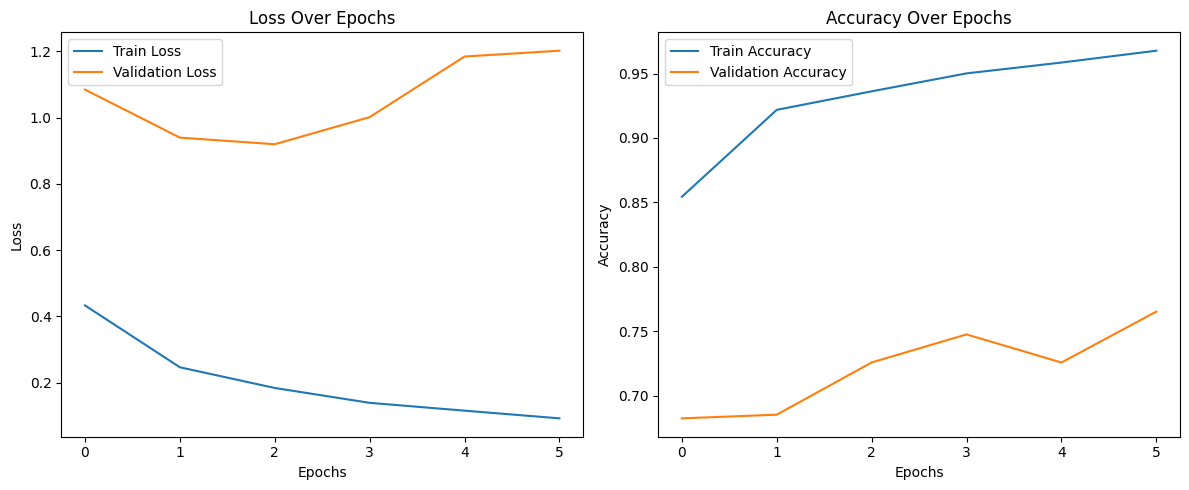

3937/3937 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     45927
           1       0.79      0.58      0.67      5126
           2       0.70      0.91      0.79      7564
           3       0.00      0.00      0.00        13
           4       0.98      0.98      0.98     67343

    accuracy                           0.95    125973
   macro avg       0.69      0.69      0.68    125973
weighted avg       0.96      0.95      0.95    125973

Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82      7165
           1       0.48      0.39      0.43      2123
           2       0.41      0.32      0.36      3500
           3       0.00      0.00      0.00        45
           4       0.73      0.96      0.83      9711

    accuracy                           0.73     22544
   macro avg       0.52      0.48      0.49     22544
weighted avg     

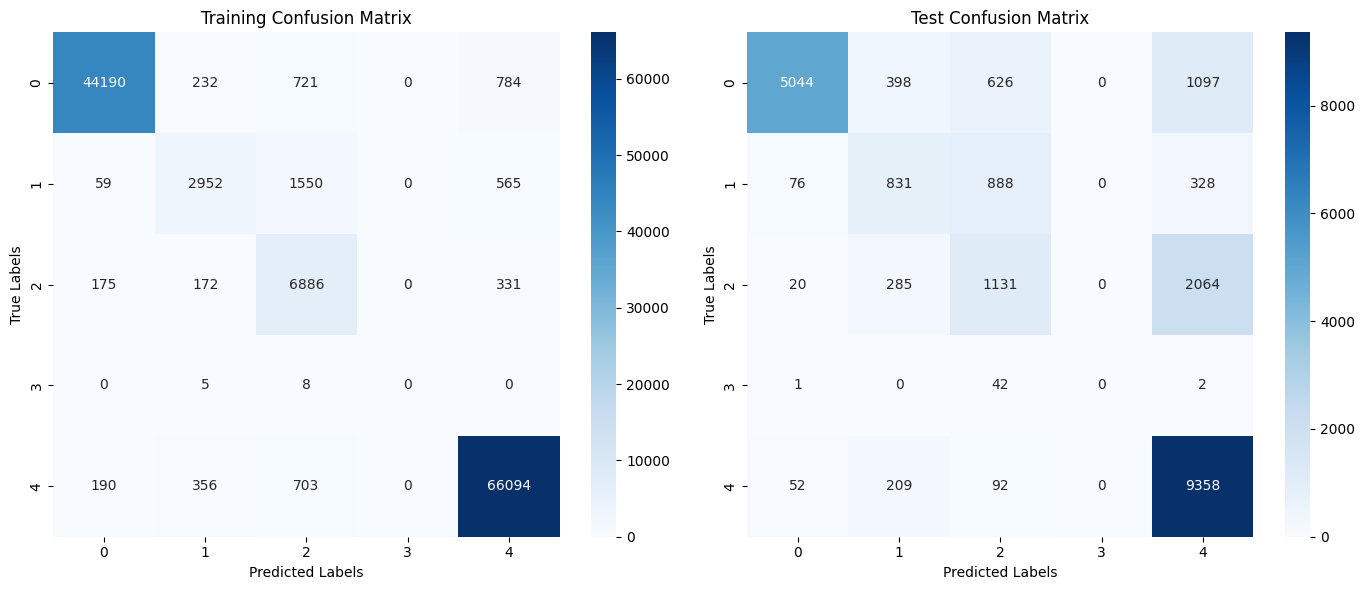

Test Accuracy: 0.7259
Classification Accuracy: 0.7259

Classification Report:
              precision    recall  f1-score   support

         Dos       0.97      0.70      0.82      7165
     Probing       0.48      0.39      0.43      2123
         R2L       0.41      0.32      0.36      3500
         U2R       0.00      0.00      0.00        45
      normal       0.73      0.96      0.83      9711

    accuracy                           0.73     22544
   macro avg       0.52      0.48      0.49     22544
weighted avg       0.73      0.73      0.71     22544

Test Accuracy: 0.7259, Classification Accuracy: 0.7259


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = Sequential()

model.add(LSTM(units=32, return_sequences=False, input_shape=(10, 1)))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

classification_acc = accuracy_score(y_true, y_pred)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_acc = accuracy_score(y_train_true, y_train_pred)
train_report = classification_report(y_train_true, y_train_pred)
train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)

test_report = classification_report(y_true, y_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

print("Training Classification Report:")
print(train_report)

print("Test Classification Report:")
print(test_report)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Training Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Classification Accuracy: {classification_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


print(f"Test Accuracy: {test_accuracy:.4f}, Classification Accuracy: {classification_acc:.4f}")


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m



Test Accuracy: 0.7259, Training Accuracy: 0.9536



Training Classification Report:
              precision    recall  f1-score   support

         Dos     0.9905    0.9622    0.9761     45927
     Probing     0.7942    0.5759    0.6676      5126
         R2L     0.6978    0.9104    0.7900      7564
         U2R     0.0000    0.0000    0.0000        13
      normal     0.9752    0.9815    0.9783     67343

    accuracy                         0.9536    125973
   macro avg     0.6915    0.6860    0.6824    125973
weighted avg     0.9567    0.9536    0.9535    125973


Test Classification Report:
              precision    recall  f1-score   support

         Dos     0.9713    0.7040    0.8163      7165
     Probing     0.4823    0.3914    0.4321      2123
         R2L     0.4070    0.3231    0.3602      3500
         U2R     0.0000    0.0000    0.0000        45
      normal     0.7283    0.9636    0.8296      9711

    accuracy                         0.7259     22544
   macro avg    

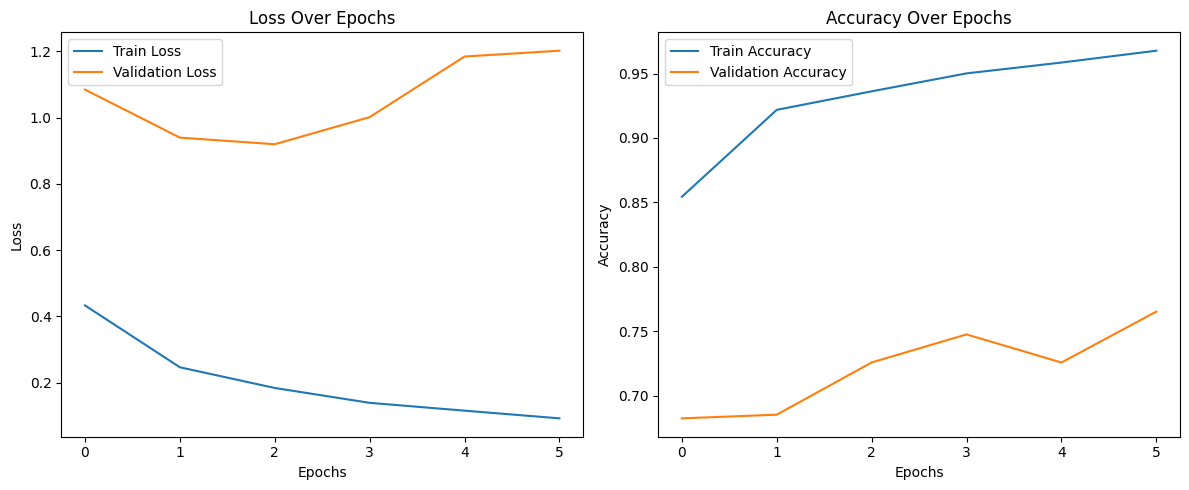

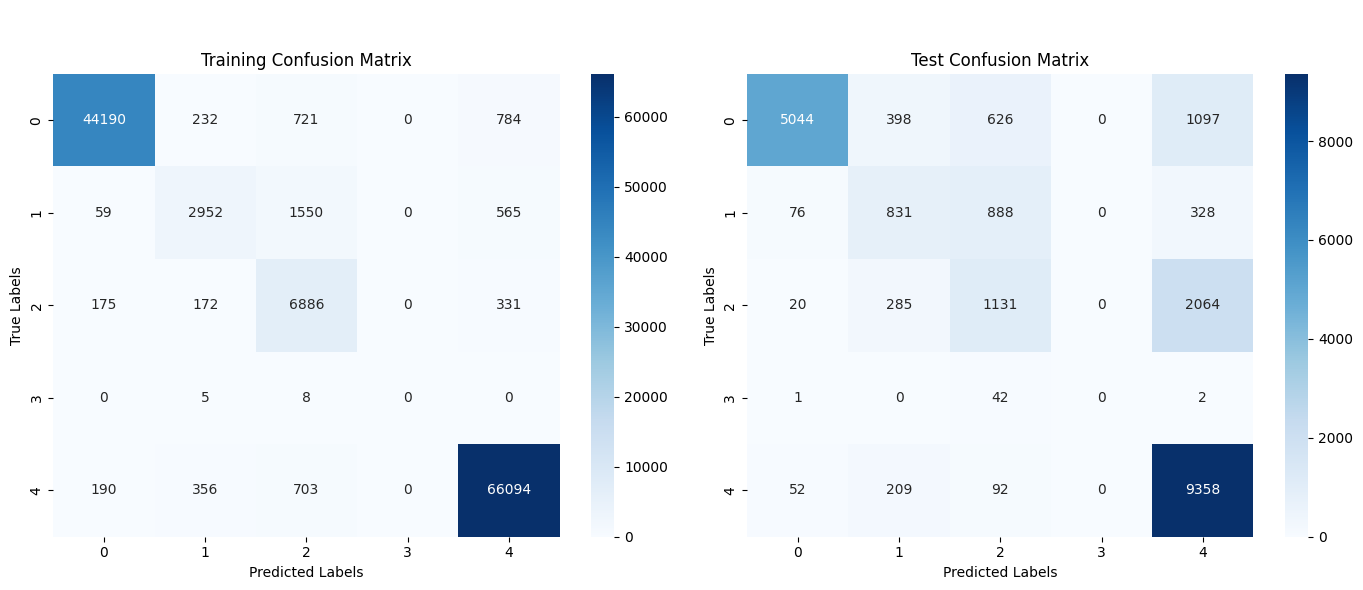


Per-Class Metrics for Training Data:
Dos: Precision=0.9905, Recall=0.9622, F1-Score=0.9761, Accuracy=0.9622
Probing: Precision=0.7942, Recall=0.5759, F1-Score=0.6676, Accuracy=0.5759
R2L: Precision=0.6978, Recall=0.9104, F1-Score=0.7900, Accuracy=0.9104
U2R: Precision=0.0000, Recall=0.0000, F1-Score=0.0000, Accuracy=0.0000
normal: Precision=0.9752, Recall=0.9815, F1-Score=0.9783, Accuracy=0.9815

Per-Class Confusion Matrices for Training Data:

Class: Dos
[[79622   424]
 [ 1737 44190]]

Class: Probing
[[120082    765]
 [  2174   2952]]

Class: R2L
[[115427   2982]
 [   678   6886]]

Class: U2R
[[125960      0]
 [    13      0]]

Class: normal
[[56950  1680]
 [ 1249 66094]]

Per-Class Metrics for Test Data:
Dos: Precision=0.9713, Recall=0.7040, F1-Score=0.8163, Accuracy=0.7040
Probing: Precision=0.4823, Recall=0.3914, F1-Score=0.4321, Accuracy=0.3914
R2L: Precision=0.4070, Recall=0.3231, F1-Score=0.3602, Accuracy=0.3231
U2R: Precision=0.0000, Recall=0.0000, F1-Score=0.0000, Accuracy=0.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_accuracy = accuracy_score(y_train_true, y_train_pred)

target_names = label_encoder.classes_

train_report = classification_report(y_train_true, y_train_pred, target_names=target_names, digits=4)
test_report = classification_report(y_true, y_pred, target_names=target_names, digits=4)

train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

def calculate_class_metrics(y_true, y_pred):
    metrics = {}
    for i, label in enumerate(target_names):
        precision = precision_score(y_true == i, y_pred == i)
        recall = recall_score(y_true == i, y_pred == i)
        f1 = f1_score(y_true == i, y_pred == i)
        accuracy = accuracy_score(y_true[y_true == i], y_pred[y_true == i])
        metrics[label] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy
        }
    return metrics




train_metrics = calculate_class_metrics(y_train_true, y_train_pred)
test_metrics = calculate_class_metrics(y_true, y_pred)


print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")



print("\n\n\nTraining Classification Report:")
print(train_report)
print("\nTest Classification Report:")
print(test_report)

# Additional metrics for all data (Precision, Recall, F1-Score, Accuracy)
def calculate_overall_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    }

train_overall_metrics = calculate_overall_metrics(y_train_true, y_train_pred)
test_overall_metrics = calculate_overall_metrics(y_true, y_pred)

print("Training Data:")
print(f"Precision: {train_overall_metrics['Precision']:.4f}")
print(f"Recall: {train_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {train_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {train_overall_metrics['Accuracy']:.4f}")

print("\nTest Data:")
print(f"Precision: {test_overall_metrics['Precision']:.4f}")
print(f"Recall: {test_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {test_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {test_overall_metrics['Accuracy']:.4f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('\n\nTraining Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


print("\nPer-Class Metrics for Training Data:")
for class_name, metrics in train_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")



print("\nPer-Class Confusion Matrices for Training Data:")
for i, label in enumerate(target_names):
    class_train_conf_matrix = confusion_matrix(y_train_true == i, y_train_pred == i)
    print(f"\nClass: {label}\n{class_train_conf_matrix}")



print("\nPer-Class Metrics for Test Data:")
for class_name, metrics in test_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")


print("\nPer-Class Confusion Matrices for Test Data:")
for i, label in enumerate(target_names):
    class_test_conf_matrix = confusion_matrix(y_true == i, y_pred == i)
    print(f"\nClass: {label}\n{class_test_conf_matrix}")

print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")


lstm + gru


lstm = 64

,

gru = 32


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1969/1969 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8234 - loss: 0.5013 - val_accuracy: 0.7096 - val_loss: 1.2707
Epoch 2/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9343 - loss: 0.2008 - val_accuracy: 0.7468 - val_loss: 0.9667
Epoch 3/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9650 - loss: 0.1027 - val_accuracy: 0.7555 - val_loss: 1.1796
Epoch 4/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9754 - loss: 0.0753 - val_accuracy: 0.7650 - val_loss: 1.2007
Epoch 5/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9801 - loss: 0.0616 - val_accuracy: 0.7756 - val_loss: 1.1593
Epoch 6/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9858 - loss: 0.0460 - val_accuracy: 0.7787 - val_loss: 1.2593
Epoch 7/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9874 - loss: 0.0412 - val_accuracy: 0.7757 - val_loss: 1.2621
Epoch 8/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9893 - loss: 0.0341 - val

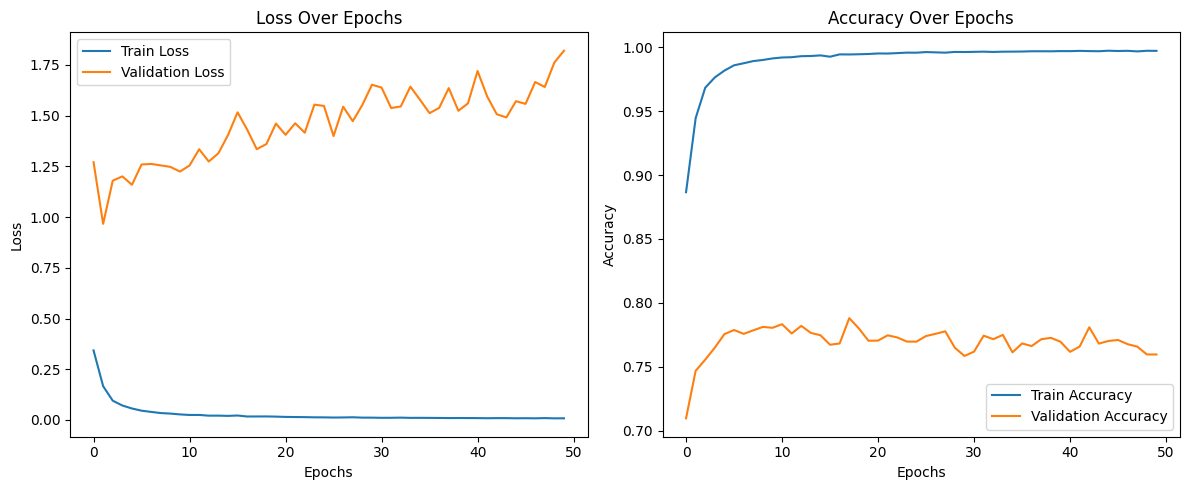

3937/3937 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45927
           1       0.99      0.99      0.99      5126
           2       0.98      0.98      0.98      7564
           3       1.00      0.15      0.27        13
           4       1.00      1.00      1.00     67343

    accuracy                           1.00    125973
   macro avg       0.99      0.83      0.85    125973
weighted avg       1.00      1.00      1.00    125973

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7165
           1       0.53      0.43      0.48      2123
           2       0.64      0.20      0.31      3500
           3       0.00      0.00      0.00        45
           4       0.74      0.97      0.84      9711

    accuracy                           0.76     22544
   macro avg       0.56    

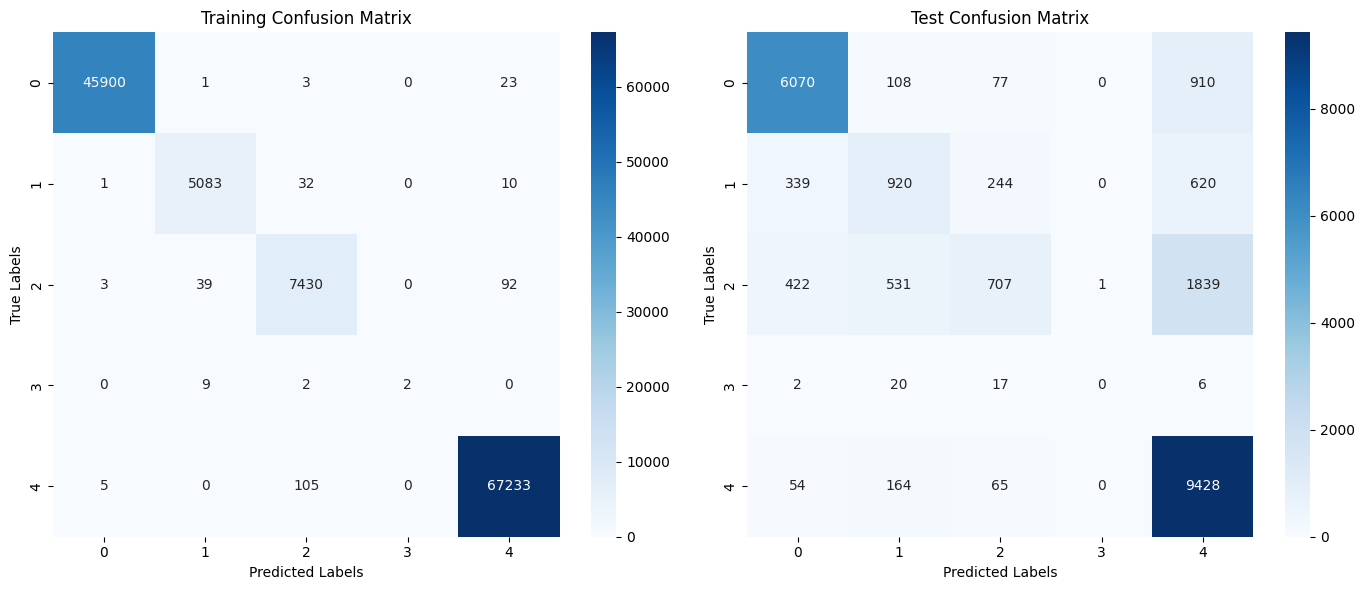

Test Accuracy: 0.7596
Classification Accuracy: 0.7596

Classification Report:
              precision    recall  f1-score   support

         Dos       0.88      0.85      0.86      7165
     Probing       0.53      0.43      0.48      2123
         R2L       0.64      0.20      0.31      3500
         U2R       0.00      0.00      0.00        45
      normal       0.74      0.97      0.84      9711

    accuracy                           0.76     22544
   macro avg       0.56      0.49      0.50     22544
weighted avg       0.75      0.76      0.73     22544

Test Accuracy: 0.7596, Classification Accuracy: 0.7596


In [ ]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)


test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(f"Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))





classification_acc = accuracy_score(y_true, y_pred)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_acc = accuracy_score(y_train_true, y_train_pred)
train_report = classification_report(y_train_true, y_train_pred)
train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)

test_report = classification_report(y_true, y_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

print("Training Classification Report:")
print(train_report)

print("Test Classification Report:")
print(test_report)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Training Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Classification Accuracy: {classification_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


print(f"Test Accuracy: {test_accuracy:.4f}, Classification Accuracy: {classification_acc:.4f}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


Test Accuracy: 0.7596, Training Accuracy: 0.9974



Training Classification Report:
              precision    recall  f1-score   support

         Dos     0.9998    0.9994    0.9996     45927
     Probing     0.9905    0.9916    0.9910      5126
         R2L     0.9812    0.9823    0.9818      7564
         U2R     1.0000    0.1538    0.2667        13
      normal     0.9981    0.9984    0.9983     67343

    accuracy                         0.9974    125973
   macro avg     0.9939    0.8251    0.8475    125973
weighted avg     0.9974    0.9974    0.9974    125973


Test Classification Report:
              precision    recall  f1-score   support

         Dos     0.8814    0.8472    0.8639      7165
     Probing     0.5278    0.4333    0.4759      2123
         R2L     0.6369    0.2020    0.3067      3500
         U2R     0.0000    0.0000    0.0000        45
      normal     0.7364    0.9709    0.8

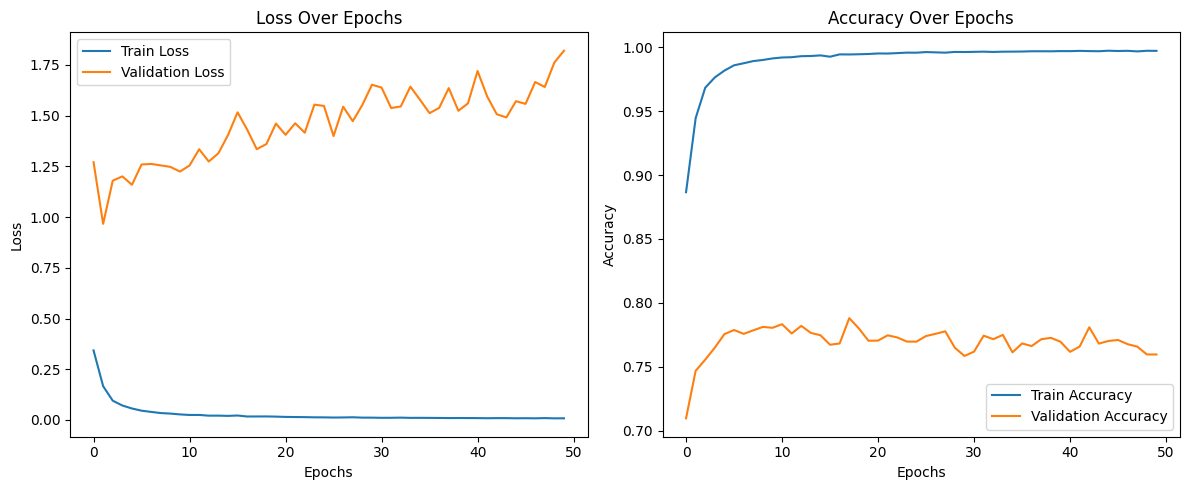

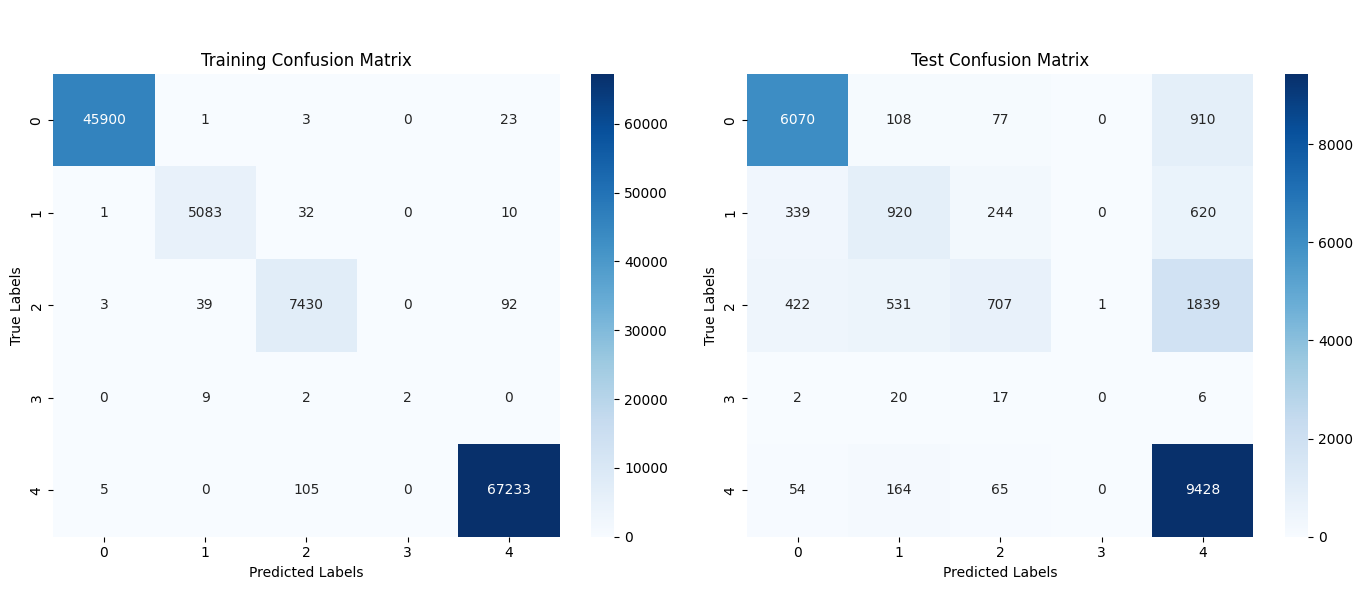


Per-Class Metrics for Training Data:
Dos: Precision=0.9998, Recall=0.9994, F1-Score=0.9996, Accuracy=0.9994
Probing: Precision=0.9905, Recall=0.9916, F1-Score=0.9910, Accuracy=0.9916
R2L: Precision=0.9812, Recall=0.9823, F1-Score=0.9818, Accuracy=0.9823
U2R: Precision=1.0000, Recall=0.1538, F1-Score=0.2667, Accuracy=0.1538
normal: Precision=0.9981, Recall=0.9984, F1-Score=0.9983, Accuracy=0.9984

Per-Class Confusion Matrices for Training Data:

Class: Dos
[[80037     9]
 [   27 45900]]

Class: Probing
[[120798     49]
 [    43   5083]]

Class: R2L
[[118267    142]
 [   134   7430]]

Class: U2R
[[125960      0]
 [    11      2]]

Class: normal
[[58505   125]
 [  110 67233]]

Per-Class Metrics for Test Data:
Dos: Precision=0.8814, Recall=0.8472, F1-Score=0.8639, Accuracy=0.8472
Probing: Precision=0.5278, Recall=0.4333, F1-Score=0.4759, Accuracy=0.4333
R2L: Precision=0.6369, Recall=0.2020, F1-Score=0.3067, Accuracy=0.2020
U2R: Precision=0.0000, Recall=0.0000, F1-Score=0.0000, Accuracy=0.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_accuracy = accuracy_score(y_train_true, y_train_pred)

target_names = label_encoder.classes_

train_report = classification_report(y_train_true, y_train_pred, target_names=target_names, digits=4)
test_report = classification_report(y_true, y_pred, target_names=target_names, digits=4)

train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

def calculate_class_metrics(y_true, y_pred):
    metrics = {}
    for i, label in enumerate(target_names):
        precision = precision_score(y_true == i, y_pred == i)
        recall = recall_score(y_true == i, y_pred == i)
        f1 = f1_score(y_true == i, y_pred == i)
        accuracy = accuracy_score(y_true[y_true == i], y_pred[y_true == i])
        metrics[label] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy
        }
    return metrics




train_metrics = calculate_class_metrics(y_train_true, y_train_pred)
test_metrics = calculate_class_metrics(y_true, y_pred)


print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")



print("\n\n\nTraining Classification Report:")
print(train_report)
print("\nTest Classification Report:")
print(test_report)

# Additional metrics for all data (Precision, Recall, F1-Score, Accuracy)
def calculate_overall_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    }

train_overall_metrics = calculate_overall_metrics(y_train_true, y_train_pred)
test_overall_metrics = calculate_overall_metrics(y_true, y_pred)

print("Training Data:")
print(f"Precision: {train_overall_metrics['Precision']:.4f}")
print(f"Recall: {train_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {train_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {train_overall_metrics['Accuracy']:.4f}")

print("\nTest Data:")
print(f"Precision: {test_overall_metrics['Precision']:.4f}")
print(f"Recall: {test_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {test_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {test_overall_metrics['Accuracy']:.4f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('\n\nTraining Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


print("\nPer-Class Metrics for Training Data:")
for class_name, metrics in train_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")



print("\nPer-Class Confusion Matrices for Training Data:")
for i, label in enumerate(target_names):
    class_train_conf_matrix = confusion_matrix(y_train_true == i, y_train_pred == i)
    print(f"\nClass: {label}\n{class_train_conf_matrix}")



print("\nPer-Class Metrics for Test Data:")
for class_name, metrics in test_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")


print("\nPer-Class Confusion Matrices for Test Data:")
for i, label in enumerate(target_names):
    class_test_conf_matrix = confusion_matrix(y_true == i, y_pred == i)
    print(f"\nClass: {label}\n{class_test_conf_matrix}")

print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")


تعداد نورون های لایه

lstm = 128

,

gru = 64

اضافه کردیم

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8546 - loss: 0.4280 - val_accuracy: 0.7017 - val_loss: 1.4946
Epoch 2/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9653 - loss: 0.0998 - val_accuracy: 0.7612 - val_loss: 1.1091
Epoch 3/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9839 - loss: 0.0501 - val_accuracy: 0.7679 - val_loss: 1.2696
Epoch 4/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9882 - loss: 0.0352 - val_accuracy: 0.7706 - val_loss: 1.2780
Epoch 5/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9899 - loss: 0.0310 - val_accuracy: 0.7528 - val_loss: 1.2932
Epoch 6/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9915 - loss: 0.0258 - val_accuracy: 0.7637 - val_loss: 1.4003
Epoch 7/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9927 - loss: 0.0223 - val_accuracy: 0.7768 - val_loss: 1.3409
Epoch 8/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9935 - loss: 0.0200 - v

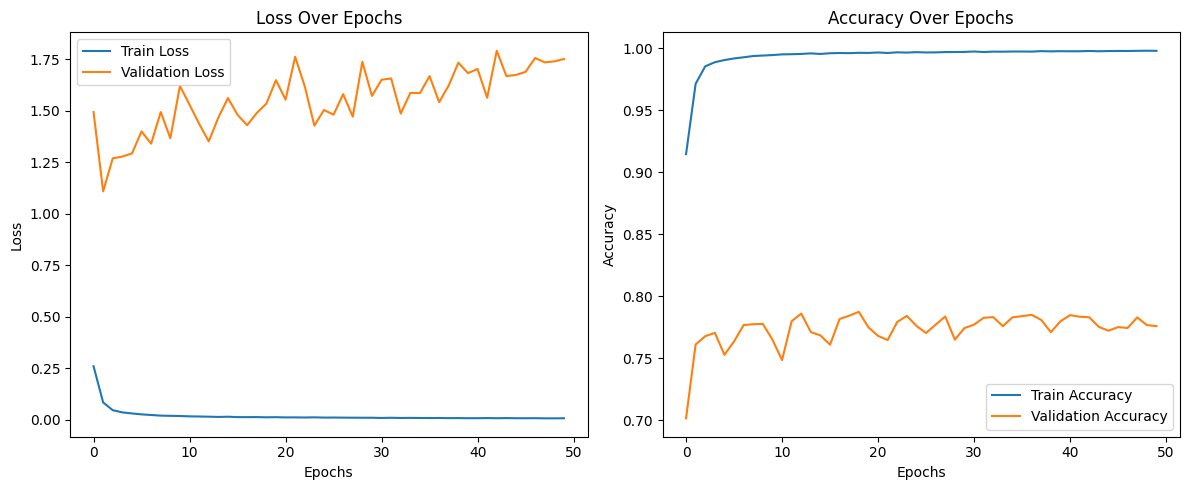

3937/3937 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45927
           1       0.99      0.99      0.99      5126
           2       0.99      0.99      0.99      7564
           3       0.89      0.62      0.73        13
           4       1.00      1.00      1.00     67343

    accuracy                           1.00    125973
   macro avg       0.97      0.92      0.94    125973
weighted avg       1.00      1.00      1.00    125973

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      7165
           1       0.51      0.42      0.46      2123
           2       0.72      0.28      0.41      3500
           3       0.06      0.04      0.05        45
           4       0.76      0.97      0.85      9711

    accuracy                           0.78     22544
   macro avg       0.59    

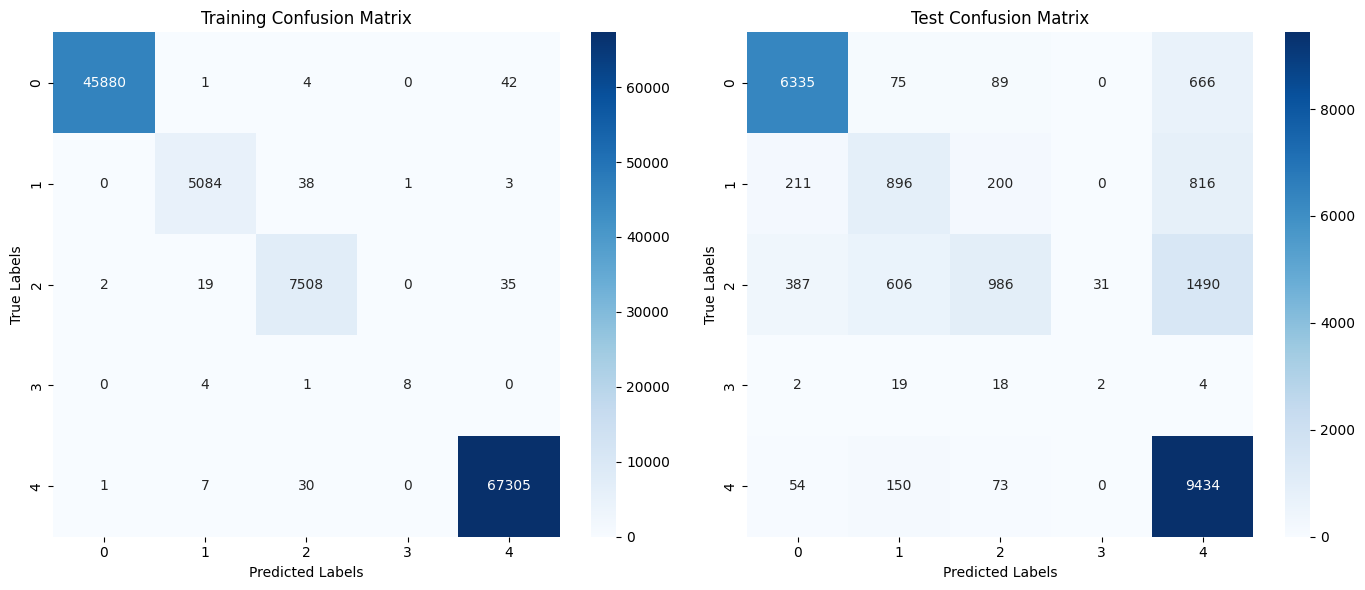

Test Accuracy: 0.7830
Classification Accuracy: 0.7830

Classification Report:
              precision    recall  f1-score   support

         Dos       0.91      0.88      0.90      7165
     Probing       0.51      0.42      0.46      2123
         R2L       0.72      0.28      0.41      3500
         U2R       0.06      0.04      0.05        45
      normal       0.76      0.97      0.85      9711

    accuracy                           0.78     22544
   macro avg       0.59      0.52      0.53     22544
weighted avg       0.78      0.78      0.76     22544

Test Accuracy: 0.7830, Classification Accuracy: 0.7830


In [ ]:
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)


test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(f"Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))





classification_acc = accuracy_score(y_true, y_pred)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_acc = accuracy_score(y_train_true, y_train_pred)
train_report = classification_report(y_train_true, y_train_pred)
train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)

test_report = classification_report(y_true, y_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

print("Training Classification Report:")
print(train_report)

print("Test Classification Report:")
print(test_report)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Training Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Classification Accuracy: {classification_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


print(f"Test Accuracy: {test_accuracy:.4f}, Classification Accuracy: {classification_acc:.4f}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


Test Accuracy: 0.7830, Training Accuracy: 0.9985



Training Classification Report:
              precision    recall  f1-score   support

         Dos     0.9999    0.9990    0.9995     45927
     Probing     0.9939    0.9918    0.9929      5126
         R2L     0.9904    0.9926    0.9915      7564
         U2R     0.8889    0.6154    0.7273        13
      normal     0.9988    0.9994    0.9991     67343

    accuracy                         0.9985    125973
   macro avg     0.9744    0.9196    0.9420    125973
weighted avg     0.9985    0.9985    0.9985    125973


Test Classification Report:
              precision    recall  f1-score   support

         Dos     0.9064    0.8842    0.8952      7165
     Probing     0.5132    0.4220    0.4632      2123
         R2L     0.7218    0.2817    0.4053      3500
         U2R     0.0606    0.0444    0.0513        45
      normal     0.7602    0.9715    0.8

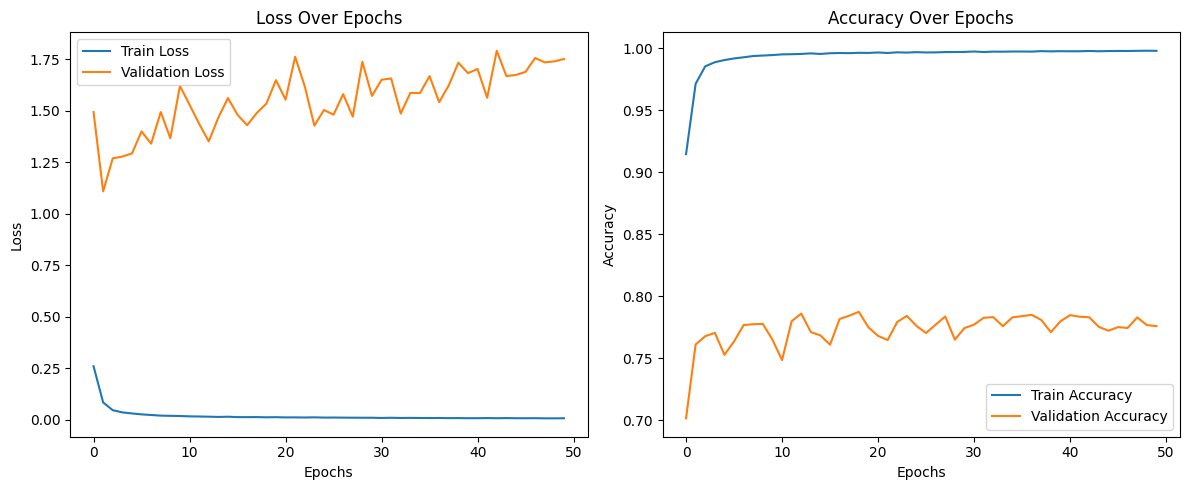

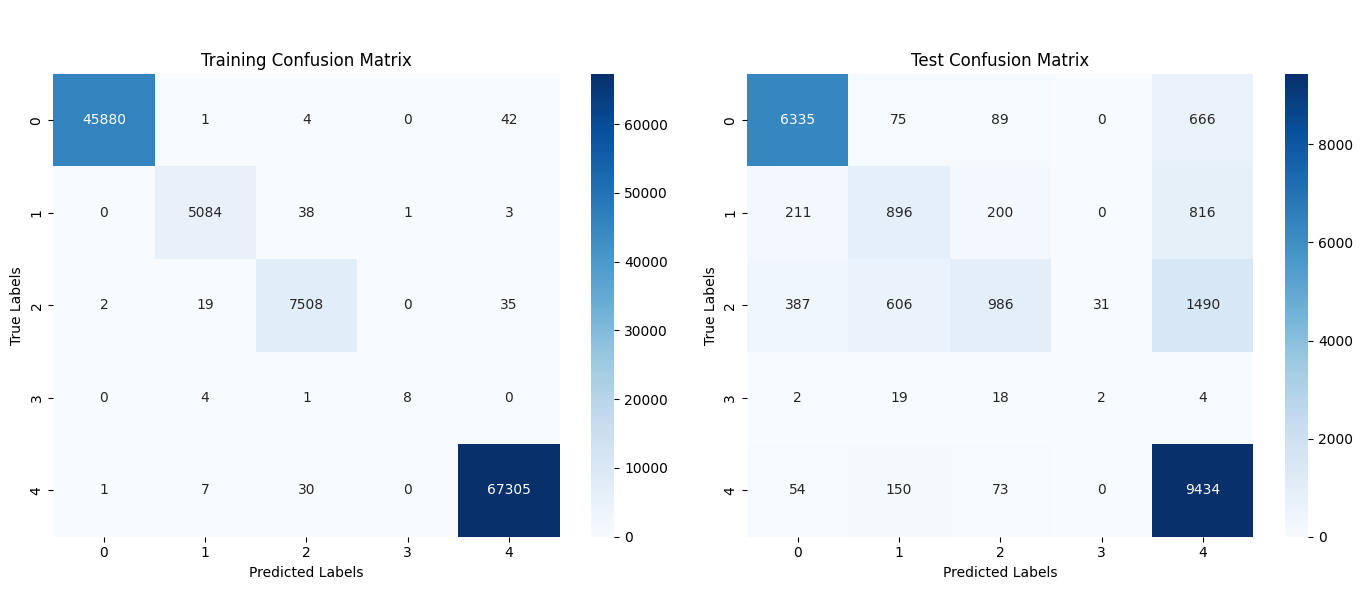


Per-Class Metrics for Training Data:
Dos: Precision=0.9999, Recall=0.9990, F1-Score=0.9995, Accuracy=0.9990
Probing: Precision=0.9939, Recall=0.9918, F1-Score=0.9929, Accuracy=0.9918
R2L: Precision=0.9904, Recall=0.9926, F1-Score=0.9915, Accuracy=0.9926
U2R: Precision=0.8889, Recall=0.6154, F1-Score=0.7273, Accuracy=0.6154
normal: Precision=0.9988, Recall=0.9994, F1-Score=0.9991, Accuracy=0.9994

Per-Class Confusion Matrices for Training Data:

Class: Dos
[[80043     3]
 [   47 45880]]

Class: Probing
[[120816     31]
 [    42   5084]]

Class: R2L
[[118336     73]
 [    56   7508]]

Class: U2R
[[125959      1]
 [     5      8]]

Class: normal
[[58550    80]
 [   38 67305]]

Per-Class Metrics for Test Data:
Dos: Precision=0.9064, Recall=0.8842, F1-Score=0.8952, Accuracy=0.8842
Probing: Precision=0.5132, Recall=0.4220, F1-Score=0.4632, Accuracy=0.4220
R2L: Precision=0.7218, Recall=0.2817, F1-Score=0.4053, Accuracy=0.2817
U2R: Precision=0.0606, Recall=0.0444, F1-Score=0.0513, Accuracy=0.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_accuracy = accuracy_score(y_train_true, y_train_pred)

target_names = label_encoder.classes_

train_report = classification_report(y_train_true, y_train_pred, target_names=target_names, digits=4)
test_report = classification_report(y_true, y_pred, target_names=target_names, digits=4)

train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

def calculate_class_metrics(y_true, y_pred):
    metrics = {}
    for i, label in enumerate(target_names):
        precision = precision_score(y_true == i, y_pred == i)
        recall = recall_score(y_true == i, y_pred == i)
        f1 = f1_score(y_true == i, y_pred == i)
        accuracy = accuracy_score(y_true[y_true == i], y_pred[y_true == i])
        metrics[label] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy
        }
    return metrics




train_metrics = calculate_class_metrics(y_train_true, y_train_pred)
test_metrics = calculate_class_metrics(y_true, y_pred)


print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")



print("\n\n\nTraining Classification Report:")
print(train_report)
print("\nTest Classification Report:")
print(test_report)

# Additional metrics for all data (Precision, Recall, F1-Score, Accuracy)
def calculate_overall_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    }

train_overall_metrics = calculate_overall_metrics(y_train_true, y_train_pred)
test_overall_metrics = calculate_overall_metrics(y_true, y_pred)

print("Training Data:")
print(f"Precision: {train_overall_metrics['Precision']:.4f}")
print(f"Recall: {train_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {train_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {train_overall_metrics['Accuracy']:.4f}")

print("\nTest Data:")
print(f"Precision: {test_overall_metrics['Precision']:.4f}")
print(f"Recall: {test_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {test_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {test_overall_metrics['Accuracy']:.4f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('\n\nTraining Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


print("\nPer-Class Metrics for Training Data:")
for class_name, metrics in train_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")



print("\nPer-Class Confusion Matrices for Training Data:")
for i, label in enumerate(target_names):
    class_train_conf_matrix = confusion_matrix(y_train_true == i, y_train_pred == i)
    print(f"\nClass: {label}\n{class_train_conf_matrix}")



print("\nPer-Class Metrics for Test Data:")
for class_name, metrics in test_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")


print("\nPer-Class Confusion Matrices for Test Data:")
for i, label in enumerate(target_names):
    class_test_conf_matrix = confusion_matrix(y_true == i, y_pred == i)
    print(f"\nClass: {label}\n{class_test_conf_matrix}")

print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1969/1969 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8427 - loss: 0.4449 - val_accuracy: 0.7162 - val_loss: 1.3207
Epoch 2/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9747 - loss: 0.0741 - val_accuracy: 0.7573 - val_loss: 1.3304
Epoch 3/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9844 - loss: 0.0456 - val_accuracy: 0.7609 - val_loss: 1.1970
Epoch 4/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9891 - loss: 0.0332 - val_accuracy: 0.7891 - val_loss: 1.2794
Epoch 5/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9912 - loss: 0.0273 - val_accuracy: 0.7756 - val_loss: 1.2832
Epoch 6/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9930 - loss: 0.0208 - val_accuracy: 0.7781 - val_loss: 1.3081
Epoch 7/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.7840 - val_loss: 1.2280
Epoch 8/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9938 - loss: 0.0191

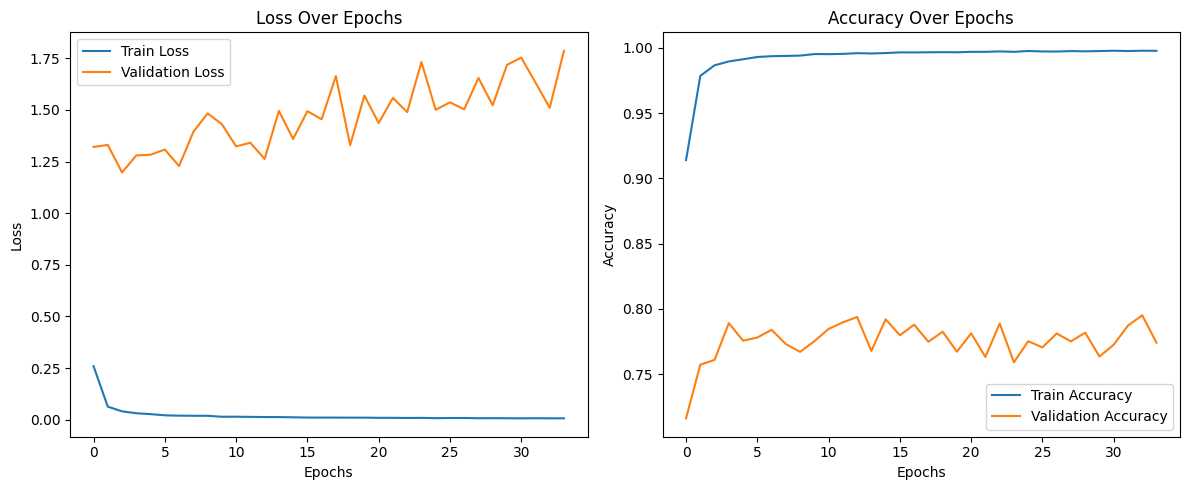

3937/3937 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45927
           1       0.99      0.99      0.99      5126
           2       0.98      0.98      0.98      7564
           3       1.00      0.38      0.56        13
           4       1.00      1.00      1.00     67343

    accuracy                           1.00    125973
   macro avg       0.99      0.87      0.90    125973
weighted avg       1.00      1.00      1.00    125973

Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      7165
           1       0.56      0.40      0.47      2123
           2       0.59      0.28      0.38      3500
           3       0.33      0.02      0.04        45
           4       0.78      0.96      0.86      9711

    accuracy                           0.77     22544
   macro avg       0.62    

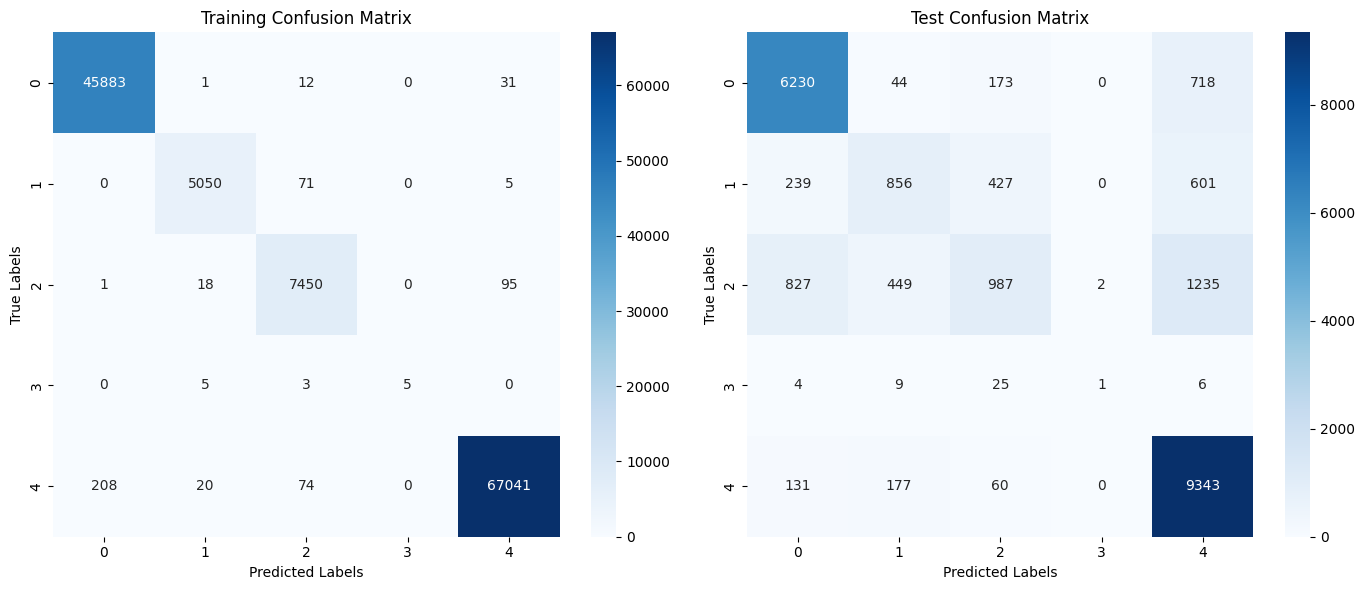

Test Accuracy: 0.7726
Classification Accuracy: 0.7726

Classification Report:
              precision    recall  f1-score   support

         Dos       0.84      0.87      0.85      7165
     Probing       0.56      0.40      0.47      2123
         R2L       0.59      0.28      0.38      3500
         U2R       0.33      0.02      0.04        45
      normal       0.78      0.96      0.86      9711

    accuracy                           0.77     22544
   macro avg       0.62      0.51      0.52     22544
weighted avg       0.75      0.77      0.75     22544

Test Accuracy: 0.7726, Classification Accuracy: 0.7726


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = Sequential()
model.add(LSTM(units=256, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)


test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(f"Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))





classification_acc = accuracy_score(y_true, y_pred)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_acc = accuracy_score(y_train_true, y_train_pred)
train_report = classification_report(y_train_true, y_train_pred)
train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)

test_report = classification_report(y_true, y_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

print("Training Classification Report:")
print(train_report)

print("Test Classification Report:")
print(test_report)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Training Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Classification Accuracy: {classification_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


print(f"Test Accuracy: {test_accuracy:.4f}, Classification Accuracy: {classification_acc:.4f}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


Test Accuracy: 0.7726, Training Accuracy: 0.9957



Training Classification Report:
              precision    recall  f1-score   support

         Dos     0.9955    0.9990    0.9973     45927
     Probing     0.9914    0.9852    0.9883      5126
         R2L     0.9790    0.9849    0.9819      7564
         U2R     1.0000    0.3846    0.5556        13
      normal     0.9980    0.9955    0.9968     67343

    accuracy                         0.9957    125973
   macro avg     0.9928    0.8699    0.9040    125973
weighted avg     0.9957    0.9957    0.9957    125973


Test Classification Report:
              precision    recall  f1-score   support

         Dos     0.8384    0.8695    0.8537      7165
     Probing     0.5577    0.4032    0.4680      2123
         R2L     0.5903    0.2820    0.3817      3500
         U2R     0.3333    0.0222    0.0417        45
      normal     0.7849    0.9621    0.8

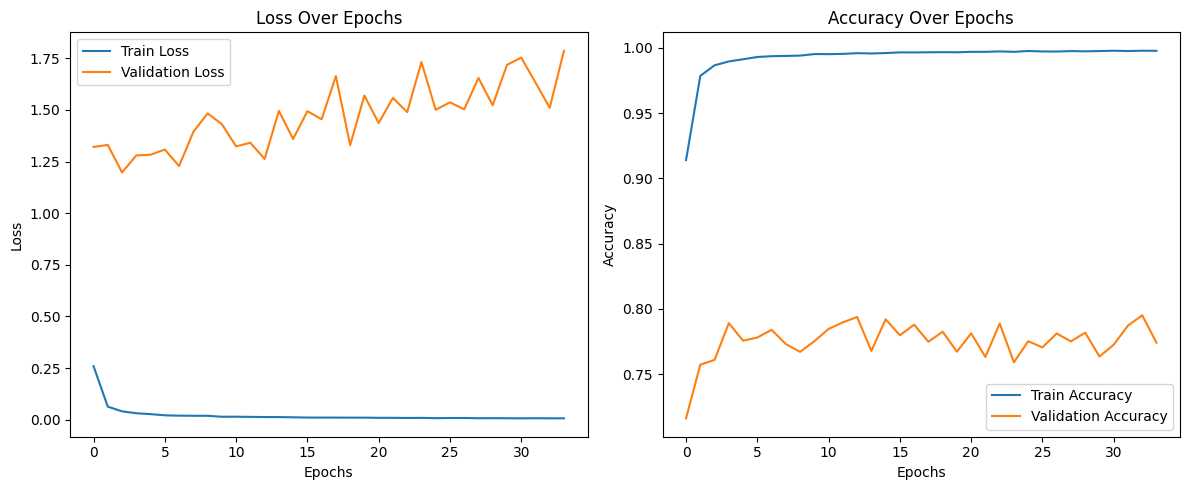

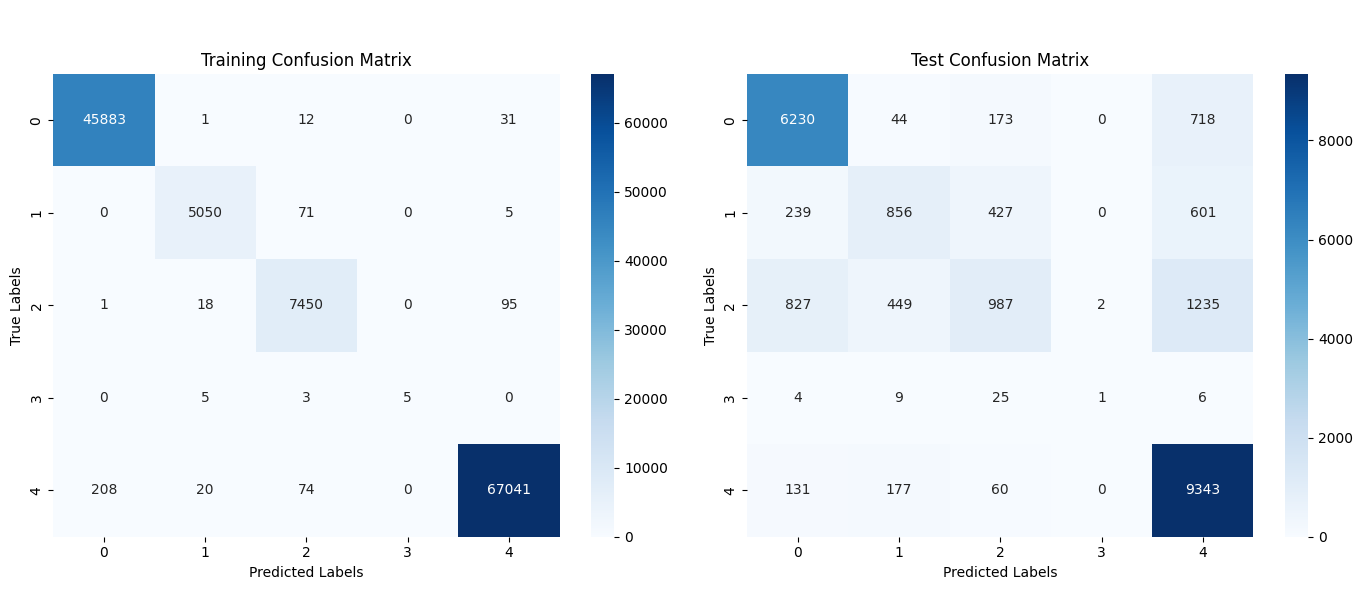


Per-Class Metrics for Training Data:
Dos: Precision=0.9955, Recall=0.9990, F1-Score=0.9973, Accuracy=0.9990
Probing: Precision=0.9914, Recall=0.9852, F1-Score=0.9883, Accuracy=0.9852
R2L: Precision=0.9790, Recall=0.9849, F1-Score=0.9819, Accuracy=0.9849
U2R: Precision=1.0000, Recall=0.3846, F1-Score=0.5556, Accuracy=0.3846
normal: Precision=0.9980, Recall=0.9955, F1-Score=0.9968, Accuracy=0.9955

Per-Class Confusion Matrices for Training Data:

Class: Dos
[[79837   209]
 [   44 45883]]

Class: Probing
[[120803     44]
 [    76   5050]]

Class: R2L
[[118249    160]
 [   114   7450]]

Class: U2R
[[125960      0]
 [     8      5]]

Class: normal
[[58499   131]
 [  302 67041]]

Per-Class Metrics for Test Data:
Dos: Precision=0.8384, Recall=0.8695, F1-Score=0.8537, Accuracy=0.8695
Probing: Precision=0.5577, Recall=0.4032, F1-Score=0.4680, Accuracy=0.4032
R2L: Precision=0.5903, Recall=0.2820, F1-Score=0.3817, Accuracy=0.2820
U2R: Precision=0.3333, Recall=0.0222, F1-Score=0.0417, Accuracy=0.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_accuracy = accuracy_score(y_train_true, y_train_pred)

target_names = label_encoder.classes_

train_report = classification_report(y_train_true, y_train_pred, target_names=target_names, digits=4)
test_report = classification_report(y_true, y_pred, target_names=target_names, digits=4)

train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

def calculate_class_metrics(y_true, y_pred):
    metrics = {}
    for i, label in enumerate(target_names):
        precision = precision_score(y_true == i, y_pred == i)
        recall = recall_score(y_true == i, y_pred == i)
        f1 = f1_score(y_true == i, y_pred == i)
        accuracy = accuracy_score(y_true[y_true == i], y_pred[y_true == i])
        metrics[label] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy
        }
    return metrics




train_metrics = calculate_class_metrics(y_train_true, y_train_pred)
test_metrics = calculate_class_metrics(y_true, y_pred)


print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")



print("\n\n\nTraining Classification Report:")
print(train_report)
print("\nTest Classification Report:")
print(test_report)

# Additional metrics for all data (Precision, Recall, F1-Score, Accuracy)
def calculate_overall_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    }

train_overall_metrics = calculate_overall_metrics(y_train_true, y_train_pred)
test_overall_metrics = calculate_overall_metrics(y_true, y_pred)

print("Training Data:")
print(f"Precision: {train_overall_metrics['Precision']:.4f}")
print(f"Recall: {train_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {train_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {train_overall_metrics['Accuracy']:.4f}")

print("\nTest Data:")
print(f"Precision: {test_overall_metrics['Precision']:.4f}")
print(f"Recall: {test_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {test_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {test_overall_metrics['Accuracy']:.4f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('\n\nTraining Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


print("\nPer-Class Metrics for Training Data:")
for class_name, metrics in train_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")



print("\nPer-Class Confusion Matrices for Training Data:")
for i, label in enumerate(target_names):
    class_train_conf_matrix = confusion_matrix(y_train_true == i, y_train_pred == i)
    print(f"\nClass: {label}\n{class_train_conf_matrix}")



print("\nPer-Class Metrics for Test Data:")
for class_name, metrics in test_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")


print("\nPer-Class Confusion Matrices for Test Data:")
for i, label in enumerate(target_names):
    class_test_conf_matrix = confusion_matrix(y_true == i, y_pred == i)
    print(f"\nClass: {label}\n{class_test_conf_matrix}")

print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")


lstm + gru + cnn

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=32, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)



test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

classification_acc = accuracy_score(y_true, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Classification Accuracy: {classification_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8323 - loss: 0.4812 - val_accuracy: 0.7260 - val_loss: 1.3294
Epoch 2/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9508 - loss: 0.1546 - val_accuracy: 0.7173 - val_loss: 1.4587
Epoch 3/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9679 - loss: 0.1040 - val_accuracy: 0.7115 - val_loss: 1.7686
Epoch 4/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9789 - loss: 0.0616 - val_accuracy: 0.7565 - val_loss: 1.5563
Epoch 5/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9869 - loss: 0.0395 - val_accuracy: 0.7655 - val_loss: 1.4643
Epoch 6/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9895 - loss: 0.0307 - val_accuracy: 0.7475 - val_loss: 2.0208
Epoch 7/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9910 - loss: 0.0270 - val_accuracy: 0.7665 - val_loss: 1.6871
Epoch 8/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9923 - loss: 

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.7757

Classification Report:
              precision    recall  f1-score   support

         Dos       0.92      0.86      0.89      7165
     Probing       0.60      0.43      0.50      2123
         R2L       0.75      0.28      0.40      3500
         U2R       0.05      0.09      0.06        45
      normal       0.73      0.97      0.83      9711

    accuracy                           0.78     22544
   macro avg       0.61      0.52      0.54     22544
weighted avg       0.78      0.78      0.75     22544



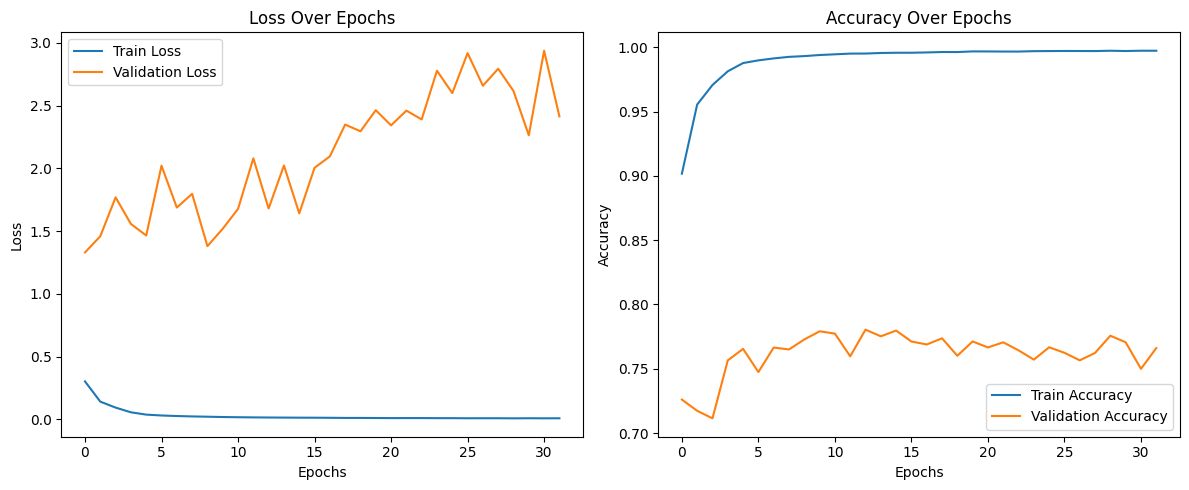

3937/3937 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45927
           1       0.99      0.99      0.99      5126
           2       0.98      0.99      0.99      7564
           3       0.70      0.54      0.61        13
           4       1.00      1.00      1.00     67343

    accuracy                           1.00    125973
   macro avg       0.93      0.90      0.92    125973
weighted avg       1.00      1.00      1.00    125973

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7165
           1       0.60      0.43      0.50      2123
           2       0.75      0.28      0.40      3500
           3       0.05      0.09      0.06        45
           4       0.73      0.97      0.83      9711

    accuracy                           0.78     22544
   macro avg       0.61    

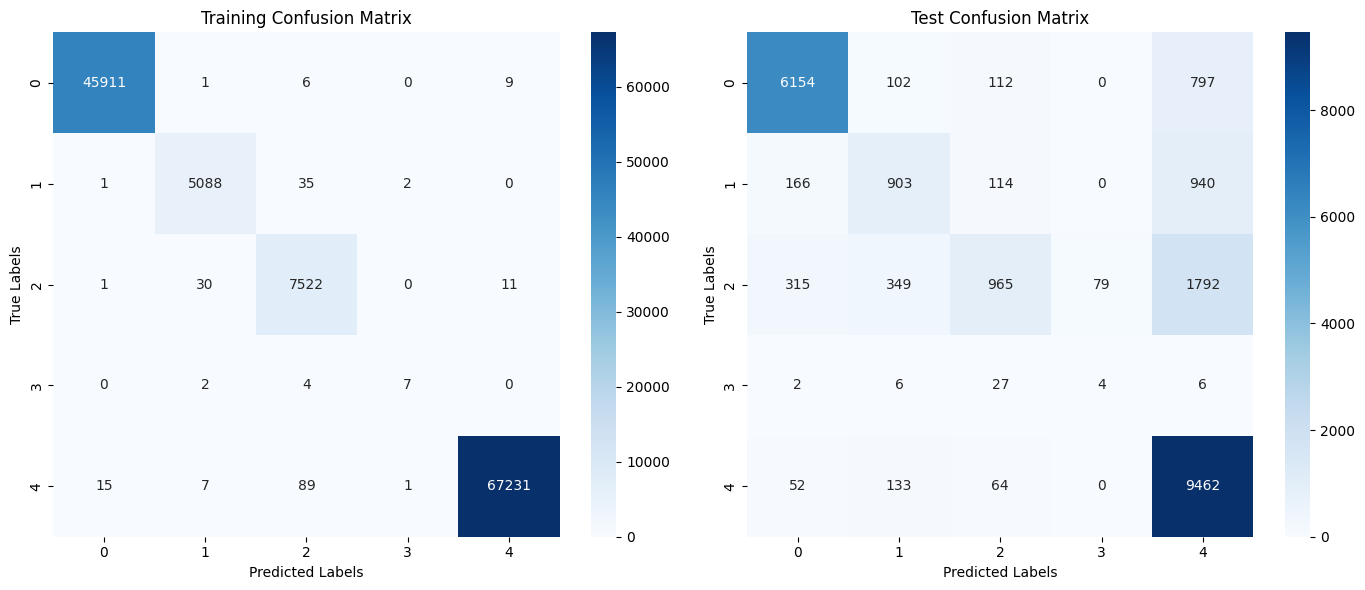

Test Accuracy: 0.7757
Classification Accuracy: 0.7757

Classification Report:
              precision    recall  f1-score   support

         Dos       0.92      0.86      0.89      7165
     Probing       0.60      0.43      0.50      2123
         R2L       0.75      0.28      0.40      3500
         U2R       0.05      0.09      0.06        45
      normal       0.73      0.97      0.83      9711

    accuracy                           0.78     22544
   macro avg       0.61      0.52      0.54     22544
weighted avg       0.78      0.78      0.75     22544

Test Accuracy: 0.7757, Classification Accuracy: 0.7757


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(f"Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))





classification_acc = accuracy_score(y_true, y_pred)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_acc = accuracy_score(y_train_true, y_train_pred)
train_report = classification_report(y_train_true, y_train_pred)
train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)

test_report = classification_report(y_true, y_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

print("Training Classification Report:")
print(train_report)

print("Test Classification Report:")
print(test_report)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Training Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Classification Accuracy: {classification_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


print(f"Test Accuracy: {test_accuracy:.4f}, Classification Accuracy: {classification_acc:.4f}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


Test Accuracy: 0.7757, Training Accuracy: 0.9983



Training Classification Report:
              precision    recall  f1-score   support

         Dos     0.9996    0.9997    0.9996     45927
     Probing     0.9922    0.9926    0.9924      5126
         R2L     0.9825    0.9944    0.9884      7564
         U2R     0.7000    0.5385    0.6087        13
      normal     0.9997    0.9983    0.9990     67343

    accuracy                         0.9983    125973
   macro avg     0.9348    0.9047    0.9176    125973
weighted avg     0.9983    0.9983    0.9983    125973


Test Classification Report:
              precision    recall  f1-score   support

         Dos     0.9200    0.8589    0.8884      7165
     Probing     0.6048    0.4253    0.4994      2123
         R2L     0.7527    0.2757    0.4036      3500
         U2R     0.0482    0.0889    0.0625        45
      normal     0.7280    0.9744    0.8

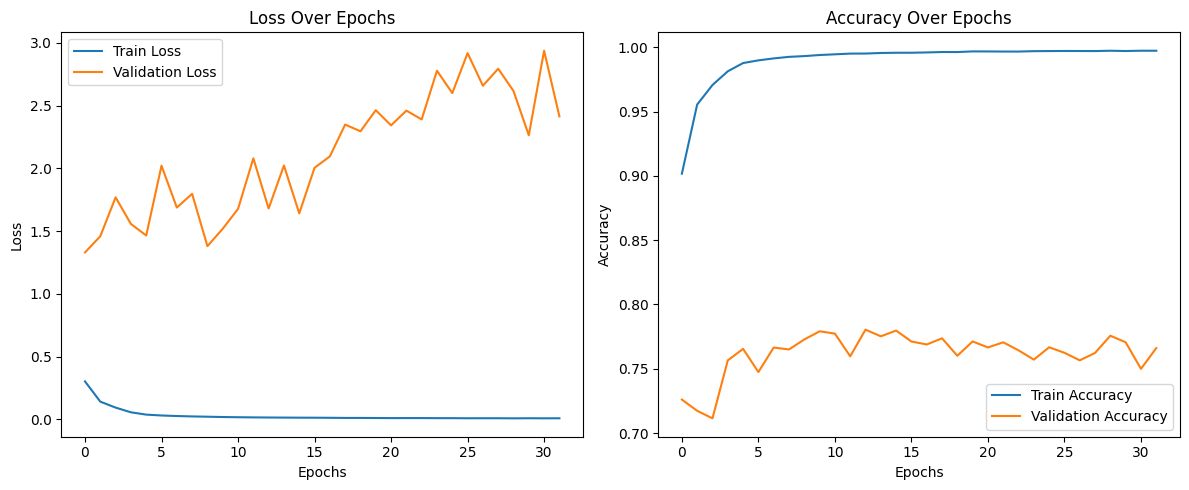

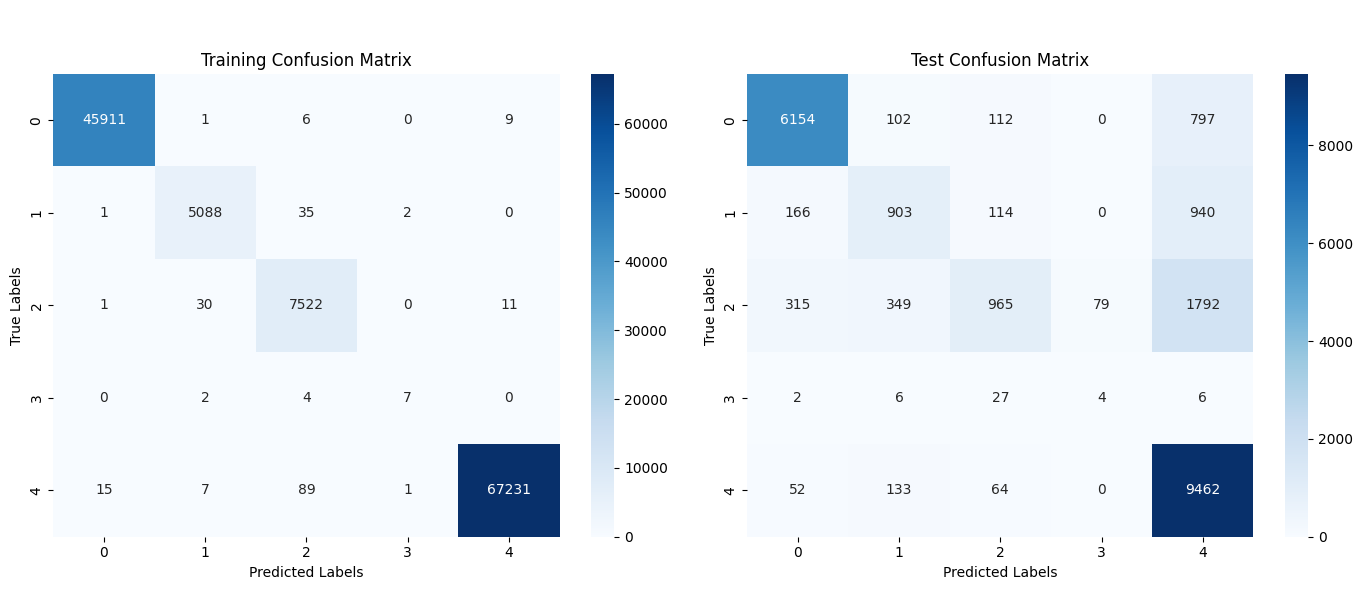


Per-Class Metrics for Training Data:
Dos: Precision=0.9996, Recall=0.9997, F1-Score=0.9996, Accuracy=0.9997
Probing: Precision=0.9922, Recall=0.9926, F1-Score=0.9924, Accuracy=0.9926
R2L: Precision=0.9825, Recall=0.9944, F1-Score=0.9884, Accuracy=0.9944
U2R: Precision=0.7000, Recall=0.5385, F1-Score=0.6087, Accuracy=0.5385
normal: Precision=0.9997, Recall=0.9983, F1-Score=0.9990, Accuracy=0.9983

Per-Class Confusion Matrices for Training Data:

Class: Dos
[[80029    17]
 [   16 45911]]

Class: Probing
[[120807     40]
 [    38   5088]]

Class: R2L
[[118275    134]
 [    42   7522]]

Class: U2R
[[125957      3]
 [     6      7]]

Class: normal
[[58610    20]
 [  112 67231]]

Per-Class Metrics for Test Data:
Dos: Precision=0.9200, Recall=0.8589, F1-Score=0.8884, Accuracy=0.8589
Probing: Precision=0.6048, Recall=0.4253, F1-Score=0.4994, Accuracy=0.4253
R2L: Precision=0.7527, Recall=0.2757, F1-Score=0.4036, Accuracy=0.2757
U2R: Precision=0.0482, Recall=0.0889, F1-Score=0.0625, Accuracy=0.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_accuracy = accuracy_score(y_train_true, y_train_pred)

target_names = label_encoder.classes_

train_report = classification_report(y_train_true, y_train_pred, target_names=target_names, digits=4)
test_report = classification_report(y_true, y_pred, target_names=target_names, digits=4)

train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)
test_conf_matrix = confusion_matrix(y_true, y_pred)

def calculate_class_metrics(y_true, y_pred):
    metrics = {}
    for i, label in enumerate(target_names):
        precision = precision_score(y_true == i, y_pred == i)
        recall = recall_score(y_true == i, y_pred == i)
        f1 = f1_score(y_true == i, y_pred == i)
        accuracy = accuracy_score(y_true[y_true == i], y_pred[y_true == i])
        metrics[label] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy
        }
    return metrics




train_metrics = calculate_class_metrics(y_train_true, y_train_pred)
test_metrics = calculate_class_metrics(y_true, y_pred)


print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")



print("\n\n\nTraining Classification Report:")
print(train_report)
print("\nTest Classification Report:")
print(test_report)

# Additional metrics for all data (Precision, Recall, F1-Score, Accuracy)
def calculate_overall_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    }

train_overall_metrics = calculate_overall_metrics(y_train_true, y_train_pred)
test_overall_metrics = calculate_overall_metrics(y_true, y_pred)

print("Training Data:")
print(f"Precision: {train_overall_metrics['Precision']:.4f}")
print(f"Recall: {train_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {train_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {train_overall_metrics['Accuracy']:.4f}")

print("\nTest Data:")
print(f"Precision: {test_overall_metrics['Precision']:.4f}")
print(f"Recall: {test_overall_metrics['Recall']:.4f}")
print(f"F1-Score: {test_overall_metrics['F1-Score']:.4f}")
print(f"Accuracy: {test_overall_metrics['Accuracy']:.4f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('\n\nTraining Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


print("\nPer-Class Metrics for Training Data:")
for class_name, metrics in train_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")



print("\nPer-Class Confusion Matrices for Training Data:")
for i, label in enumerate(target_names):
    class_train_conf_matrix = confusion_matrix(y_train_true == i, y_train_pred == i)
    print(f"\nClass: {label}\n{class_train_conf_matrix}")



print("\nPer-Class Metrics for Test Data:")
for class_name, metrics in test_metrics.items():
    print(f"{class_name}: Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1-Score={metrics['F1-Score']:.4f}, Accuracy={metrics['Accuracy']:.4f}")


print("\nPer-Class Confusion Matrices for Test Data:")
for i, label in enumerate(target_names):
    class_test_conf_matrix = confusion_matrix(y_true == i, y_pred == i)
    print(f"\nClass: {label}\n{class_test_conf_matrix}")

print(f"\n\nTest Accuracy: {test_accuracy:.4f}, Training Accuracy: {train_accuracy:.4f}")
